# What is in this dataset ?

<ul>

<li>The gold rates from 29-12-1978 to 10-09-2020 present in this dataset.</li>
<li>The rates are calculated in 1 troy ounce, ie in 31.1034768 grams.</li>
<li> converted price per troy ounce to price per gram.</li>
<li> we are considering only five countries i.e India, Us, Europe, Canada, Australia and extracting the same from the dataset.</li>
<li> using 5 machine learning models on one country  and taking the best accuracy model on rest of all the countries.</li>
</ul>



## Importing libraries and dataset

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [116]:
data=pd.read_csv("Gold_Prices.csv")
data

Name  US dollar    Euro  Japanese yen  Pound sterling  \
0      12/29/1978      226.0   137.1           NaN           110.7   
1        1/1/1979      226.0   137.1           NaN           110.7   
2        1/2/1979      226.8   137.3       43164.9           111.5   
3        1/3/1979      218.6   134.0       43717.9           108.0   
4        1/4/1979      223.2   136.8       43674.9           110.7   
...           ...        ...     ...           ...             ...   
10896   10/5/2020     1909.6  1619.3      201739.7          1471.4   
10897   10/6/2020     1913.4  1622.7      202083.7          1475.0   
10898   10/7/2020     1884.5  1602.3      199804.1          1461.0   
10899   10/8/2020     1887.5  1606.5      200116.9          1459.9   
10900   10/9/2020     1923.2  1627.9      203201.0          1479.7   

       Canadian dollar  Swiss franc  Indian rupee  Chinese renmimbi  \
0                  NaN          NaN           NaN               NaN   
1                  NaN          NaN           NaN               NaN   
2                263.7        359.6        1792.8               NaN   
3                264.4        365.9        1802.2               NaN   
4                264.1        366.4        1811.7               NaN   
...                ...          ...           ...               ...   
10896           2533.1       1747.1      139954.6           13005.5   
10897           2537.9       1749.0      140560.7           13031.4   
10898           2503.7       1728.2      138176.2           12834.6   
10899           2496.1       1732.2      138241.5           12854.7   
10900           2526.1       1753.4      140676.1           12912.1   

       US dollar.1  ...  Vietnamese dong  Egyptian pound  Korean won  Euro.1  \
0            226.0  ...              NaN             NaN         NaN   137.1   
1            226.0  ...              NaN             NaN         NaN   137.1   
2            226.8  ...              NaN             NaN    107470.0   137.3   
3            218.6  ...              NaN             NaN    108027.4   134.0   
4            223.2  ...              NaN             NaN    108602.5   136.8   
...            ...  ...              ...             ...         ...     ...   
10896       1909.6  ...       44310360.7         30057.1   2221724.1  1619.3   
10897       1913.4  ...       44405228.2         30088.2   2221457.3  1622.7   
10898       1884.5  ...       43730764.8         29551.3   2182533.5  1602.3   
10899       1887.5  ...       43773739.3         29651.8   2176701.7  1606.5   
10900       1923.2  ...       44605937.2         30214.3   2217988.1  1627.9   

       Russian ruble  US dollar.2  South African rand  Chinese renmimbi.1  \
0                NaN        226.0                 NaN                 NaN   
1                NaN        226.0                 NaN                 NaN   
2                NaN        226.8               194.6                 NaN   
3                NaN        218.6               192.2                 NaN   
4                NaN        223.2               193.0                 NaN   
...              ...          ...                 ...                 ...   
10896       149390.4       1909.6             31453.5             13005.5   
10897       149144.9       1913.4             31570.0             13031.4   
10898       147410.3       1884.5             31373.4             12834.6   
10899       146305.7       1887.5             31298.7             12854.7   
10900       147532.5       1923.2             31601.4             12912.1   

       Canadian dollar.1  Australian dollar  
0                    NaN                NaN  
1                    NaN                NaN  
2                  263.7              193.6  
3                  264.4              193.0  
4                  264.1              194.6  
...                  ...                ...  
10896             2533.1             2655.7  
10897             2537.9             2671.4  
10898             2

In [117]:
data.shape

(10901, 25)

## Data analysis and cleaning the data

In [118]:
data["DD"]=pd.to_datetime(data["Name"]).dt.day
data["MM"]=pd.to_datetime(data["Name"]).dt.month
data["YYYY"]=pd.to_datetime(data["Name"]).dt.year

In [119]:
data

Name  US dollar    Euro  Japanese yen  Pound sterling  \
0      12/29/1978      226.0   137.1           NaN           110.7   
1        1/1/1979      226.0   137.1           NaN           110.7   
2        1/2/1979      226.8   137.3       43164.9           111.5   
3        1/3/1979      218.6   134.0       43717.9           108.0   
4        1/4/1979      223.2   136.8       43674.9           110.7   
...           ...        ...     ...           ...             ...   
10896   10/5/2020     1909.6  1619.3      201739.7          1471.4   
10897   10/6/2020     1913.4  1622.7      202083.7          1475.0   
10898   10/7/2020     1884.5  1602.3      199804.1          1461.0   
10899   10/8/2020     1887.5  1606.5      200116.9          1459.9   
10900   10/9/2020     1923.2  1627.9      203201.0          1479.7   

       Canadian dollar  Swiss franc  Indian rupee  Chinese renmimbi  \
0                  NaN          NaN           NaN               NaN   
1                  NaN          NaN           NaN               NaN   
2                263.7        359.6        1792.8               NaN   
3                264.4        365.9        1802.2               NaN   
4                264.1        366.4        1811.7               NaN   
...                ...          ...           ...               ...   
10896           2533.1       1747.1      139954.6           13005.5   
10897           2537.9       1749.0      140560.7           13031.4   
10898           2503.7       1728.2      138176.2           12834.6   
10899           2496.1       1732.2      138241.5           12854.7   
10900           2526.1       1753.4      140676.1           12912.1   

       US dollar.1  ...  Euro.1  Russian ruble  US dollar.2  \
0            226.0  ...   137.1            NaN        226.0   
1            226.0  ...   137.1            NaN        226.0   
2            226.8  ...   137.3            NaN        226.8   
3            218.6  ...   134.0            NaN        218.6   
4            223.2  ...   136.8            NaN        223.2   
...            ...  ...     ...            ...          ...   
10896       1909.6  ...  1619.3       149390.4       1909.6   
10897       1913.4  ...  1622.7       149144.9       1913.4   
10898       1884.5  ...  1602.3       147410.3       1884.5   
10899       1887.5  ...  1606.5       146305.7       1887.5   
10900       1923.2  ...  1627.9       147532.5       1923.2   

       South African rand  Chinese renmimbi.1  Canadian dollar.1  \
0                     NaN                 NaN                NaN   
1                     NaN                 NaN                NaN   
2                   194.6                 NaN              263.7   
3                   192.2                 NaN              264.4   
4                   193.0                 NaN              264.1   
...                   ...                 ...                ...   
10896             31453.5             13005.5             2533.1   
10897             31570.0             13031.4             2537.9   
10898             31373.4             12834.6             2503.7   
10899             31298.7             12854.7             2496.1   
10900             31601.4             12912.1             2526.1   

       Australian dollar  DD  MM  YYYY  
0                    NaN  29  12  1978  
1                    NaN   1   1  1979  
2                  193.6   2   1  1979  
3                  193.0   3   1  1979  
4                  194.6   4   1  1979  
...                  ...  ..  ..   ...  
10896             2655.7   5  10  2020  
10897             2671.4   6  10  2020  
10898             2640.1   7  10  2020  
10899             2637.0   8  10  2020  
10900             2661.0   9  10  2020  

[10901 rows x 28 columns]

In [120]:
third_column=data.pop("YYYY")
data.insert(0,"YYYY",third_column)
second_column=data.pop("MM")
data.insert(0,"MM",second_column)
first_column=data.pop("DD")
data.insert(0,"DD",first_column)

In [121]:
data=data.drop(["Name"],axis=1)
data

DD  MM  YYYY  US dollar    Euro  Japanese yen  Pound sterling  \
0      29  12  1978      226.0   137.1           NaN           110.7   
1       1   1  1979      226.0   137.1           NaN           110.7   
2       2   1  1979      226.8   137.3       43164.9           111.5   
3       3   1  1979      218.6   134.0       43717.9           108.0   
4       4   1  1979      223.2   136.8       43674.9           110.7   
...    ..  ..   ...        ...     ...           ...             ...   
10896   5  10  2020     1909.6  1619.3      201739.7          1471.4   
10897   6  10  2020     1913.4  1622.7      202083.7          1475.0   
10898   7  10  2020     1884.5  1602.3      199804.1          1461.0   
10899   8  10  2020     1887.5  1606.5      200116.9          1459.9   
10900   9  10  2020     1923.2  1627.9      203201.0          1479.7   

       Canadian dollar  Swiss franc  Indian rupee  ...  Vietnamese dong  \
0                  NaN          NaN           NaN  ...              NaN   
1                  NaN          NaN           NaN  ...              NaN   
2                263.7        359.6        1792.8  ...              NaN   
3                264.4        365.9        1802.2  ...              NaN   
4                264.1        366.4        1811.7  ...              NaN   
...                ...          ...           ...  ...              ...   
10896           2533.1       1747.1      139954.6  ...       44310360.7   
10897           2537.9       1749.0      140560.7  ...       44405228.2   
10898           2503.7       1728.2      138176.2  ...       43730764.8   
10899           2496.1       1732.2      138241.5  ...       43773739.3   
10900           2526.1       1753.4      140676.1  ...       44605937.2   

       Egyptian pound  Korean won  Euro.1  Russian ruble  US dollar.2  \
0                 NaN         NaN   137.1            NaN        226.0   
1                 NaN         NaN   137.1            NaN        226.0   
2                 NaN    107470.0   137.3            NaN        226.8   
3                 NaN    108027.4   134.0            NaN        218.6   
4                 NaN    108602.5   136.8            NaN        223.2   
...               ...         ...     ...            ...          ...   
10896         30057.1   2221724.1  1619.3       149390.4       1909.6   
10897         30088.2   2221457.3  1622.7       149144.9       1913.4   
10898         29551.3   2182533.5  1602.3       147410.3       1884.5   
10899         29651.8   2176701.7  1606.5       146305.7       1887.5   
10900         30214.3   2217988.1  1627.9       147532.5       1923.2   

       South African rand  Chinese renmimbi.1  Canadian dollar.1  \
0                     NaN                 NaN                NaN   
1                     NaN                 NaN                NaN   
2                   194.6                 NaN              263.7   
3                   192.2                 NaN              264.4   
4                   193.0                 NaN              264.1   
...                   ...                 ...                ...   
10896             31453.5             13005.5             2533.1   
10897             31570.0             13031.4             2537.9   
10898             31373.4             12834.6             2503.7   
10899             31298.7             12854.7             2496.1   
10900             31601.4             12912.1             2526.1   

       Australian dollar  
0                    NaN  
1                    NaN  
2                  193.6  
3                  193.0  
4                  194.6  
...                  ...  
10896             2655.7  
10897             2671.4  
10898             2640.1  
10899             2637.0  
10900             2661.0  

[10901 rows x 27 columns]

In [122]:
data.head()

DD  MM  YYYY  US dollar   Euro  Japanese yen  Pound sterling  \
0  29  12  1978      226.0  137.1           NaN           110.7   
1   1   1  1979      226.0  137.1           NaN           110.7   
2   2   1  1979      226.8  137.3       43164.9           111.5   
3   3   1  1979      218.6  134.0       43717.9           108.0   
4   4   1  1979      223.2  136.8       43674.9           110.7   

   Canadian dollar  Swiss franc  Indian rupee  ...  Vietnamese dong  \
0              NaN          NaN           NaN  ...              NaN   
1              NaN          NaN           NaN  ...              NaN   
2            263.7        359.6        1792.8  ...              NaN   
3            264.4        365.9        1802.2  ...              NaN   
4            264.1        366.4        1811.7  ...              NaN   

   Egyptian pound  Korean won  Euro.1  Russian ruble  US dollar.2  \
0             NaN         NaN   137.1            NaN        226.0   
1             NaN         NaN   137.1            NaN        226.0   
2             NaN    107470.0   137.3            NaN        226.8   
3             NaN    108027.4   134.0            NaN        218.6   
4             NaN    108602.5   136.8            NaN        223.2   

   South African rand  Chinese renmimbi.1  Canadian dollar.1  \
0                 NaN                 NaN                NaN   
1                 NaN                 NaN                NaN   
2               194.6                 NaN              263.7   
3               192.2                 NaN              264.4   
4               193.0                 NaN              264.1   

   Australian dollar  
0                NaN  
1                NaN  
2              193.6  
3              193.0  
4              194.6  

[5 rows x 27 columns]

In [123]:
data.tail()

DD  MM  YYYY  US dollar    Euro  Japanese yen  Pound sterling  \
10896   5  10  2020     1909.6  1619.3      201739.7          1471.4   
10897   6  10  2020     1913.4  1622.7      202083.7          1475.0   
10898   7  10  2020     1884.5  1602.3      199804.1          1461.0   
10899   8  10  2020     1887.5  1606.5      200116.9          1459.9   
10900   9  10  2020     1923.2  1627.9      203201.0          1479.7   

       Canadian dollar  Swiss franc  Indian rupee  ...  Vietnamese dong  \
10896           2533.1       1747.1      139954.6  ...       44310360.7   
10897           2537.9       1749.0      140560.7  ...       44405228.2   
10898           2503.7       1728.2      138176.2  ...       43730764.8   
10899           2496.1       1732.2      138241.5  ...       43773739.3   
10900           2526.1       1753.4      140676.1  ...       44605937.2   

       Egyptian pound  Korean won  Euro.1  Russian ruble  US dollar.2  \
10896         30057.1   2221724.1  1619.3       149390.4       1909.6   
10897         30088.2   2221457.3  1622.7       149144.9       1913.4   
10898         29551.3   2182533.5  1602.3       147410.3       1884.5   
10899         29651.8   2176701.7  1606.5       146305.7       1887.5   
10900         30214.3   2217988.1  1627.9       147532.5       1923.2   

       South African rand  Chinese renmimbi.1  Canadian dollar.1  \
10896             31453.5             13005.5             2533.1   
10897             31570.0             13031.4             2537.9   
10898             31373.4             12834.6             2503.7   
10899             31298.7             12854.7             2496.1   
10900             31601.4             12912.1             2526.1   

       Australian dollar  
10896             2655.7  
10897             2671.4  
10898             2640.1  
10899             2637.0  
10900             2661.0  

[5 rows x 27 columns]

In [124]:
data.isnull().sum()

DD                       0
MM                       0
YYYY                     0
US dollar                0
Euro                     0
Japanese yen             2
Pound sterling           0
Canadian dollar          2
Swiss franc              2
Indian rupee             2
Chinese renmimbi      1571
US dollar.1              0
Turkish lira          1045
Saudi riyal              2
Indonesian rupiah        2
UAE dirham               2
Thai baht                2
Vietnamese dong       2851
Egyptian pound        2591
Korean won               2
Euro.1                   0
Russian ruble         3661
US dollar.2              0
South African rand       2
Chinese renmimbi.1    1571
Canadian dollar.1        2
Australian dollar        2
dtype: int64

In [125]:
data.columns


Index(['DD', 'MM', 'YYYY', 'US dollar', 'Euro', 'Japanese yen',
       'Pound sterling', 'Canadian dollar', 'Swiss franc', 'Indian rupee',
       'Chinese renmimbi', 'US dollar.1', 'Turkish lira', 'Saudi riyal',
       'Indonesian rupiah', 'UAE dirham', 'Thai baht', 'Vietnamese dong',
       'Egyptian pound', 'Korean won', 'Euro.1', 'Russian ruble',
       'US dollar.2', 'South African rand', 'Chinese renmimbi.1',
       'Canadian dollar.1', 'Australian dollar'],
      dtype='object')

In [126]:
new_data=data[["DD","MM","YYYY","Indian rupee","US dollar","Euro","Canadian dollar","Australian dollar"]]
new_data

DD  MM  YYYY  Indian rupee  US dollar    Euro  Canadian dollar  \
0      29  12  1978           NaN      226.0   137.1              NaN   
1       1   1  1979           NaN      226.0   137.1              NaN   
2       2   1  1979        1792.8      226.8   137.3            263.7   
3       3   1  1979        1802.2      218.6   134.0            264.4   
4       4   1  1979        1811.7      223.2   136.8            264.1   
...    ..  ..   ...           ...        ...     ...              ...   
10896   5  10  2020      139954.6     1909.6  1619.3           2533.1   
10897   6  10  2020      140560.7     1913.4  1622.7           2537.9   
10898   7  10  2020      138176.2     1884.5  1602.3           2503.7   
10899   8  10  2020      138241.5     1887.5  1606.5           2496.1   
10900   9  10  2020      140676.1     1923.2  1627.9           2526.1   

       Australian dollar  
0                    NaN  
1                    NaN  
2                  193.6  
3                  193.0  
4                  194.6  
...                  ...  
10896             2655.7  
10897             2671.4  
10898             2640.1  
10899             2637.0  
10900             2661.0  

[10901 rows x 8 columns]

In [127]:
new_data=new_data.dropna()

In [128]:
new_data.isnull().sum()

DD                   0
MM                   0
YYYY                 0
Indian rupee         0
US dollar            0
Euro                 0
Canadian dollar      0
Australian dollar    0
dtype: int64

In [129]:
new_data.describe()

DD            MM          YYYY   Indian rupee     US dollar  \
count  10899.000000  10899.000000  10899.000000   10899.000000  10899.000000   
mean      15.725388      6.497660   1999.390770   31098.948729    671.174548   
std        8.801387      3.441068     12.060488   33473.276672    450.865261   
min        1.000000      1.000000   1979.000000    1782.000000    216.800000   
25%        8.000000      4.000000   1989.000000    6175.450000    351.100000   
50%       16.000000      7.000000   1999.000000   12750.700000    412.400000   
75%       23.000000      9.000000   2010.000000   54384.850000   1110.400000   
max       31.000000     12.000000   2020.000000  154901.900000   2067.200000   

              Euro  Canadian dollar  Australian dollar  
count  10899.00000     10899.000000       10899.000000  
mean     554.47430       814.053601         838.654592  
std      361.44999       511.557860         536.161836  
min      133.80000       256.800000         189.800000  
25%      304.60000       453.300000         474.300000  
50%      360.60000       531.600000         548.800000  
75%      874.20000      1231.550000        1337.450000  
max     1745.50000      2749.300000        2863.300000

 # INDIA DATA 

In [130]:
ind_price=new_data[["DD","MM","YYYY","Indian rupee"]]
ind_price["Rs/gram"]=ind_price["Indian rupee"].apply(lambda x:x/31.2)
ind_price

DD  MM  YYYY  Indian rupee      Rs/gram
2       2   1  1979        1792.8    57.461538
3       3   1  1979        1802.2    57.762821
4       4   1  1979        1811.7    58.067308
5       5   1  1979        1843.6    59.089744
6       8   1  1979        1841.3    59.016026
...    ..  ..   ...           ...          ...
10896   5  10  2020      139954.6  4485.724359
10897   6  10  2020      140560.7  4505.150641
10898   7  10  2020      138176.2  4428.724359
10899   8  10  2020      138241.5  4430.817308
10900   9  10  2020      140676.1  4508.849359

[10899 rows x 5 columns]

# US DATA

In [131]:
us_price=new_data[["DD","MM","YYYY","US dollar"]]
us_price["$/gram"]=us_price["US dollar"].apply(lambda x:x/31.2)
us_price

DD  MM  YYYY  US dollar     $/gram
2       2   1  1979      226.8   7.269231
3       3   1  1979      218.6   7.006410
4       4   1  1979      223.2   7.153846
5       5   1  1979      225.5   7.227564
6       8   1  1979      223.1   7.150641
...    ..  ..   ...        ...        ...
10896   5  10  2020     1909.6  61.205128
10897   6  10  2020     1913.4  61.326923
10898   7  10  2020     1884.5  60.400641
10899   8  10  2020     1887.5  60.496795
10900   9  10  2020     1923.2  61.641026

[10899 rows x 5 columns]

# EUROPE DATA

In [132]:
euro_price=new_data[["DD","MM","YYYY","Euro"]]
euro_price["Euro/gram"]=euro_price["Euro"].apply(lambda x:x/31.2)
euro_price

DD  MM  YYYY    Euro  Euro/gram
2       2   1  1979   137.3   4.400641
3       3   1  1979   134.0   4.294872
4       4   1  1979   136.8   4.384615
5       5   1  1979   138.3   4.432692
6       8   1  1979   136.4   4.371795
...    ..  ..   ...     ...        ...
10896   5  10  2020  1619.3  51.900641
10897   6  10  2020  1622.7  52.009615
10898   7  10  2020  1602.3  51.355769
10899   8  10  2020  1606.5  51.490385
10900   9  10  2020  1627.9  52.176282

[10899 rows x 5 columns]

# CANADA DATA

In [133]:
can_price=new_data[["DD","MM","YYYY","Canadian dollar"]]
can_price["can$/gram"]=can_price["Canadian dollar"].apply(lambda x:x/31.2)
can_price

DD  MM  YYYY  Canadian dollar  can$/gram
2       2   1  1979            263.7   8.451923
3       3   1  1979            264.4   8.474359
4       4   1  1979            264.1   8.464744
5       5   1  1979            268.4   8.602564
6       8   1  1979            269.5   8.637821
...    ..  ..   ...              ...        ...
10896   5  10  2020           2533.1  81.189103
10897   6  10  2020           2537.9  81.342949
10898   7  10  2020           2503.7  80.246795
10899   8  10  2020           2496.1  80.003205
10900   9  10  2020           2526.1  80.964744

[10899 rows x 5 columns]

# AUSTRALIA DATA

In [134]:
aus_price=new_data[["DD","MM","YYYY","Australian dollar"]]
aus_price["aus$/gram"]=aus_price["Australian dollar"].apply(lambda x:x/31.2)
aus_price


DD  MM  YYYY  Australian dollar  aus$/gram
2       2   1  1979              193.6   6.205128
3       3   1  1979              193.0   6.185897
4       4   1  1979              194.6   6.237179
5       5   1  1979              197.9   6.342949
6       8   1  1979              197.9   6.342949
...    ..  ..   ...                ...        ...
10896   5  10  2020             2655.7  85.118590
10897   6  10  2020             2671.4  85.621795
10898   7  10  2020             2640.1  84.618590
10899   8  10  2020             2637.0  84.519231
10900   9  10  2020             2661.0  85.288462

[10899 rows x 5 columns]

<h1 style="color:red">Data Visualization on Indian Gold Prices </h1>


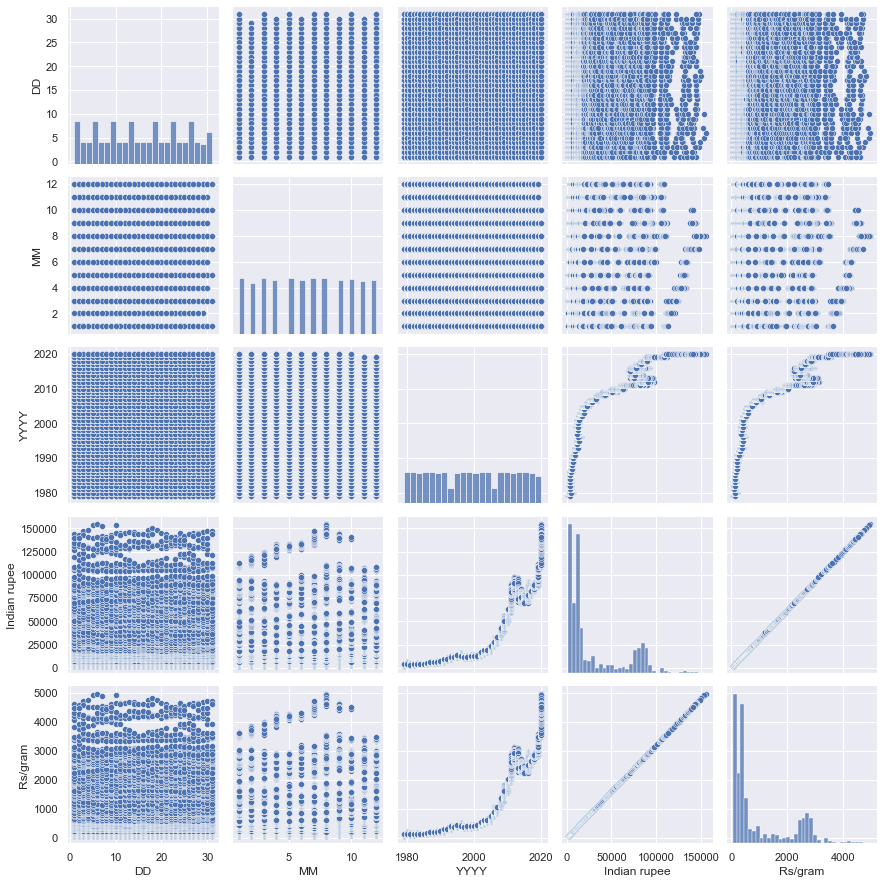

In [135]:
sns.pairplot(ind_price)

<AxesSubplot:xlabel='Rs/gram', ylabel='Density'>

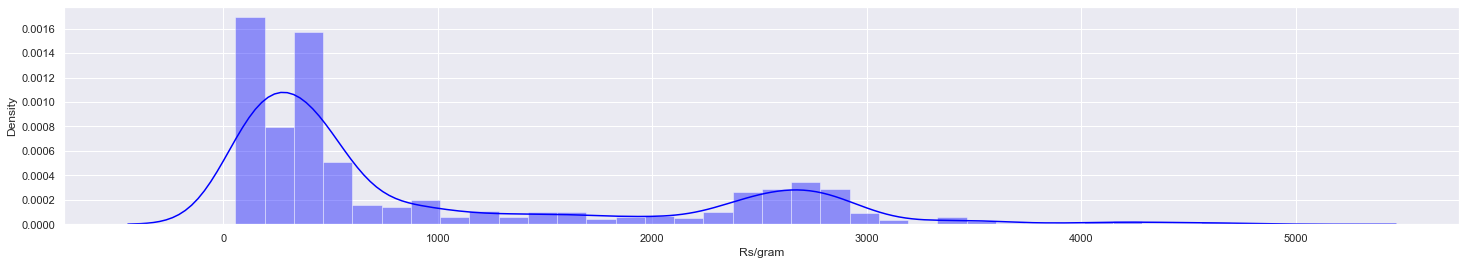

In [136]:
sns.distplot(ind_price["Rs/gram"],color="blue")

<AxesSubplot:>

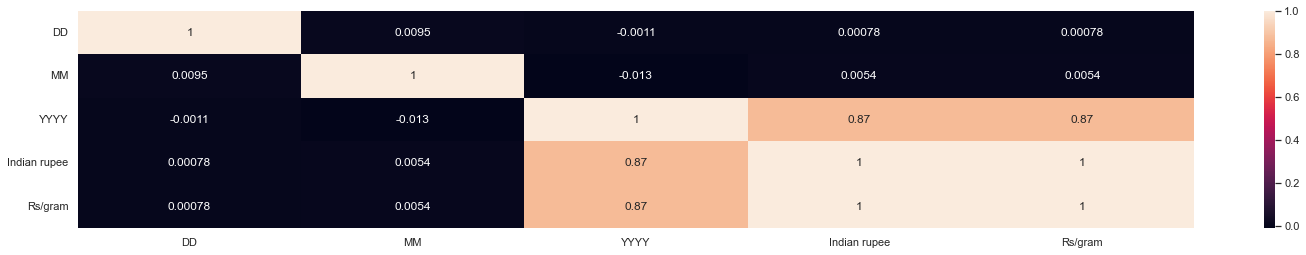

In [137]:
sns.heatmap(ind_price.corr(),annot=True)

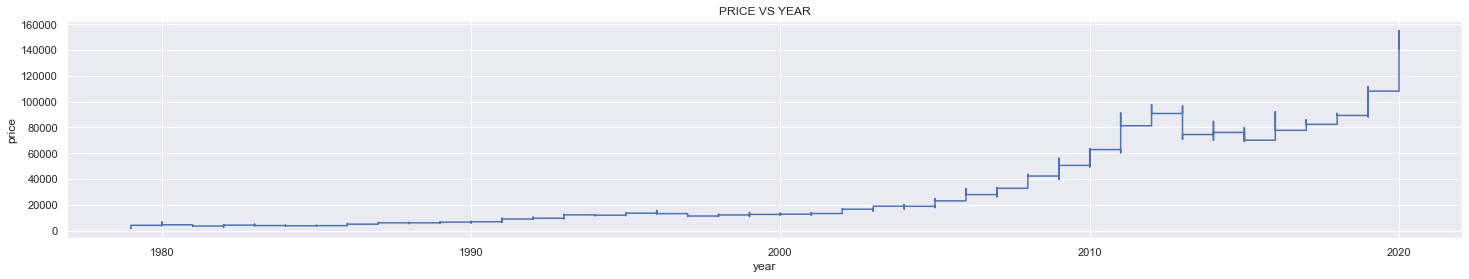

In [138]:

plt.plot(ind_price["YYYY"],ind_price["Indian rupee"])
plt.title("PRICE VS YEAR")
plt.xlabel("year")
plt.ylabel("price")
plt.show()



<AxesSubplot:xlabel='YYYY', ylabel='Indian rupee'>

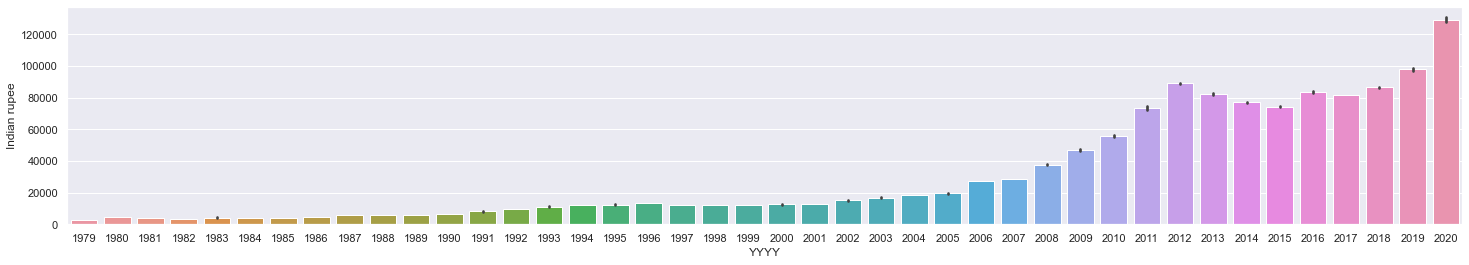

In [139]:
sns.set(rc={"figure.figsize":(25, 4)})
sns.barplot(data=ind_price,x="YYYY",y="Indian rupee")

 <h1 style="color:green">Data Visualization on US Gold Prices </h1>

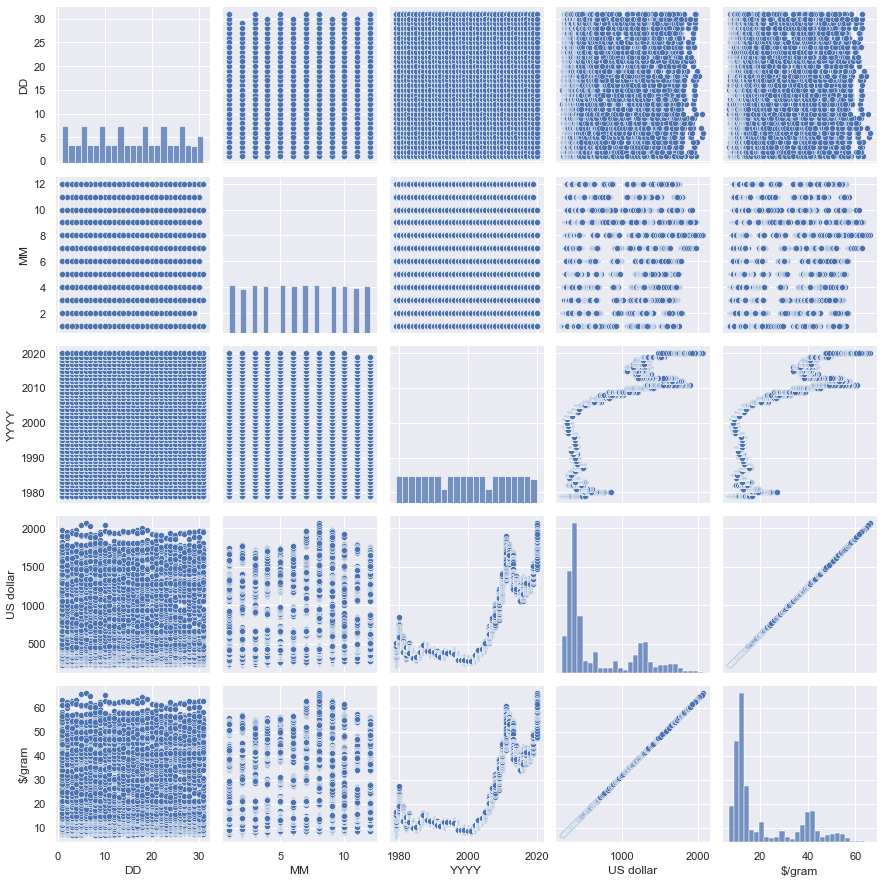

In [140]:
sns.pairplot(us_price)

<AxesSubplot:>

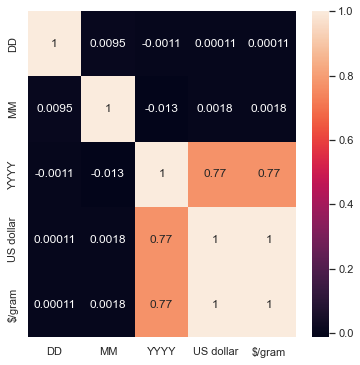

In [141]:
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(us_price.corr(),annot=True)

<AxesSubplot:xlabel='YYYY', ylabel='US dollar'>

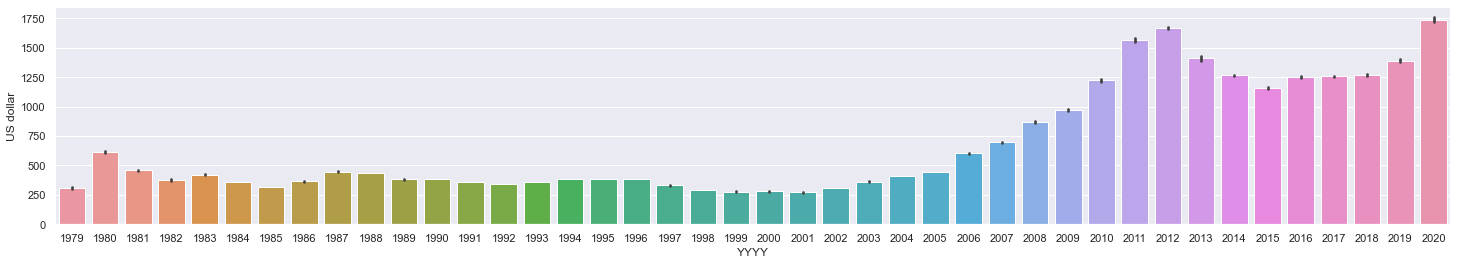

In [142]:
sns.set(rc={"figure.figsize":(25, 4)})
sns.barplot(data=us_price,x="YYYY",y="US dollar")


<AxesSubplot:xlabel='US dollar', ylabel='Density'>

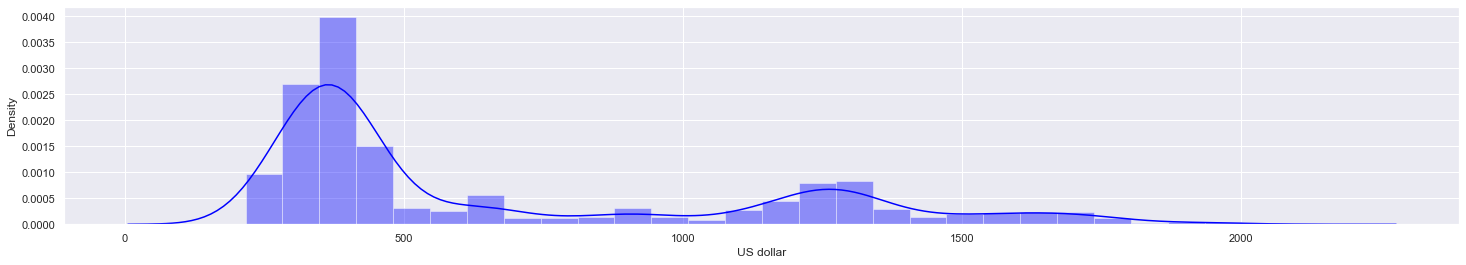

In [143]:
sns.distplot(us_price["US dollar"],color="blue")

<h1 style="color:blue">Data Visualization on European Gold Prices </h1> 

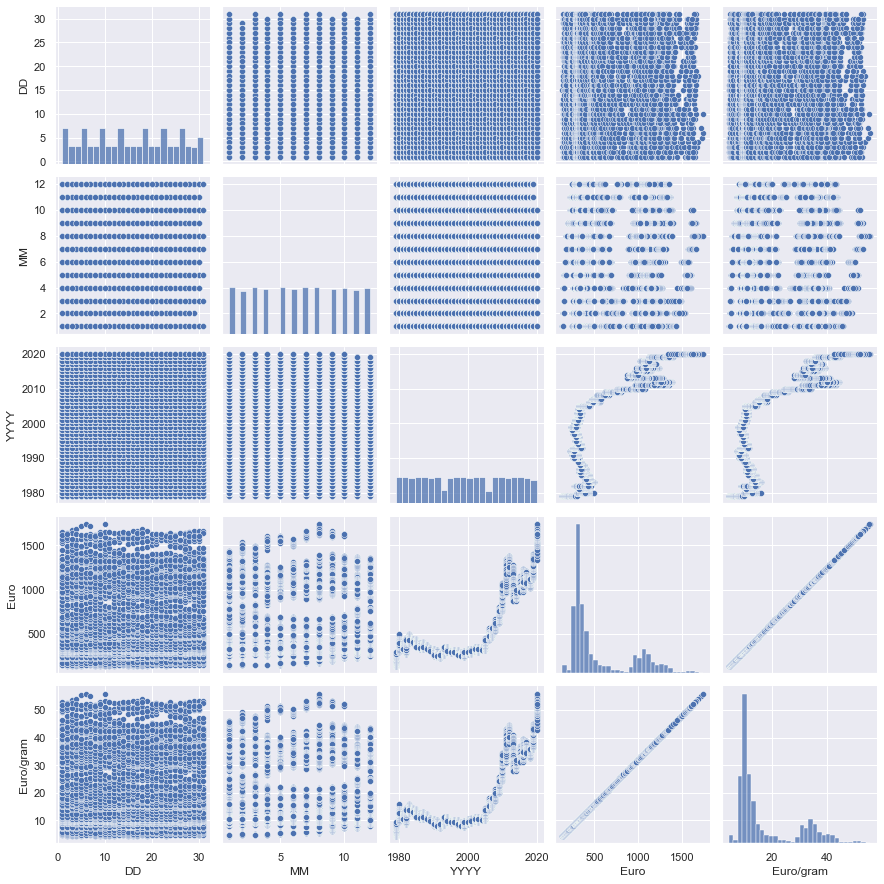

In [144]:
sns.pairplot(euro_price)

<AxesSubplot:xlabel='YYYY', ylabel='Euro'>

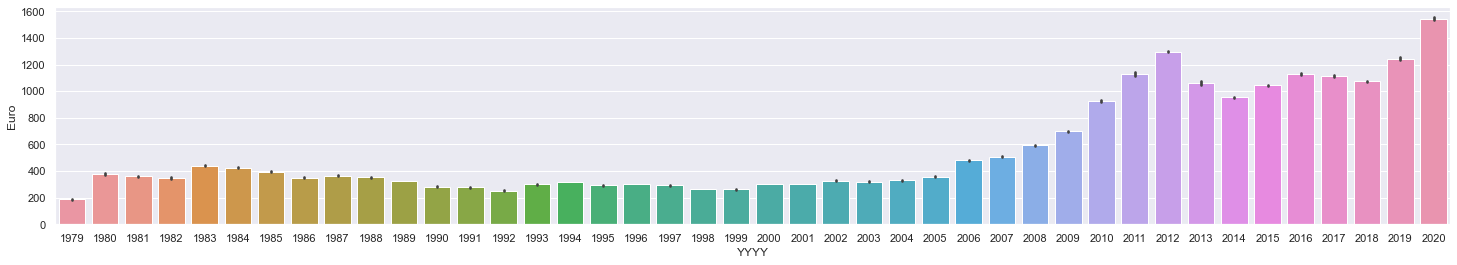

In [145]:
sns.set(rc={"figure.figsize":(25, 4)})
sns.barplot(data=euro_price,x="YYYY",y="Euro")

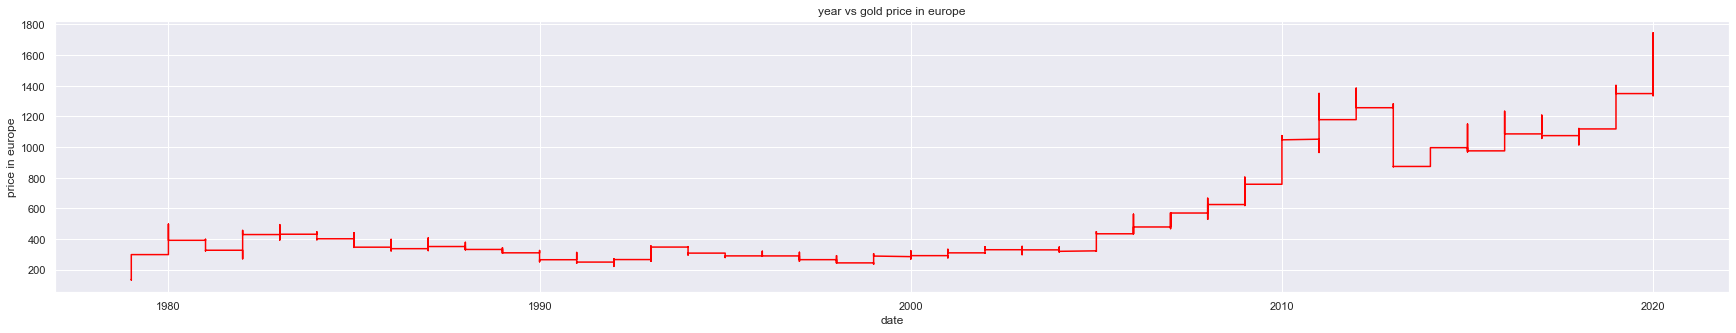

In [146]:
plt.figure(figsize=(30,5))
plt.plot(euro_price["YYYY"],euro_price["Euro"],color="red")
plt.title("year vs gold price in europe")
plt.xlabel("date")
plt.ylabel("price in europe")
plt.show()

<AxesSubplot:xlabel='Euro', ylabel='Density'>

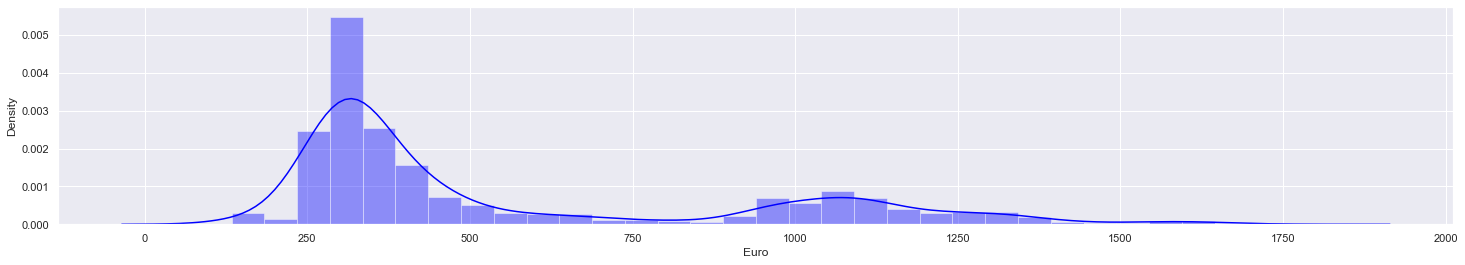

In [147]:
sns.distplot(euro_price["Euro"],color="blue")

 <h1 style="color:BLACK">Data Visualization on canada Gold Prices </h1>

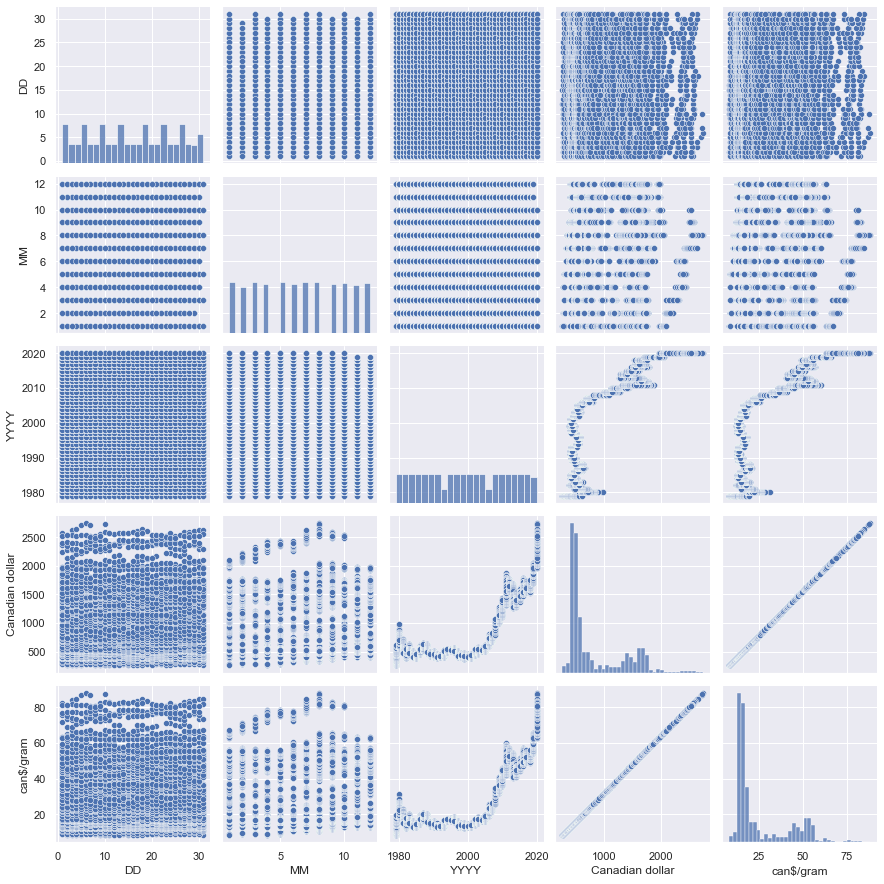

In [148]:
sns.pairplot(can_price)

<AxesSubplot:xlabel='YYYY', ylabel='Canadian dollar'>

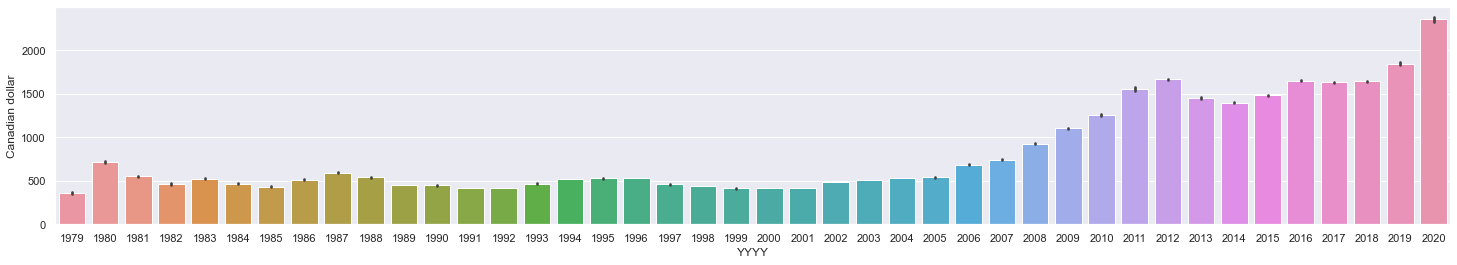

In [149]:
sns.set(rc={"figure.figsize":(25, 4)})
sns.barplot(data=can_price,x="YYYY",y="Canadian dollar")

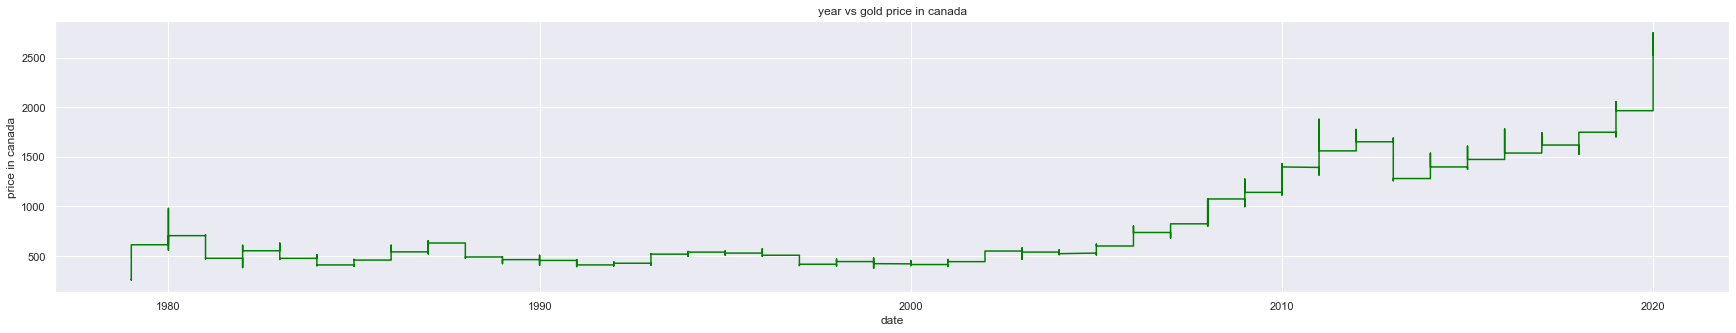

In [150]:
plt.figure(figsize=(30,5))
plt.plot(can_price["YYYY"],can_price["Canadian dollar"],color="green")
plt.title("year vs gold price in canada")
plt.xlabel("date")
plt.ylabel("price in canada")
plt.show()

<AxesSubplot:xlabel='Canadian dollar', ylabel='Density'>

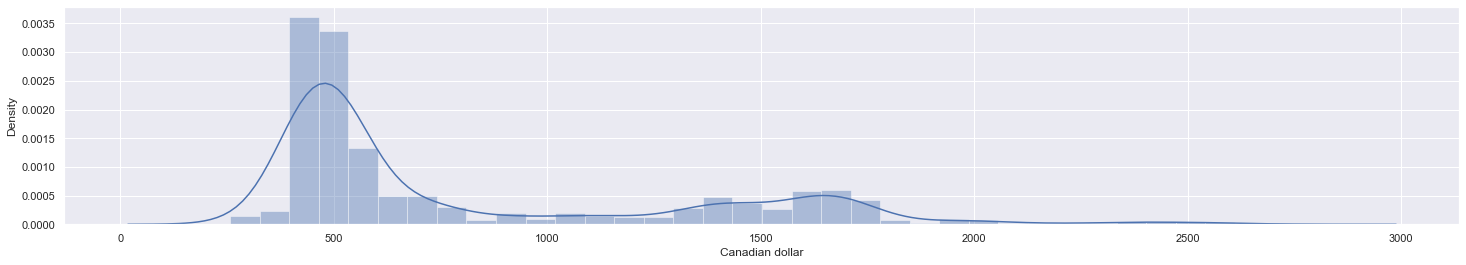

In [151]:
sns.distplot(can_price["Canadian dollar"])

<AxesSubplot:>

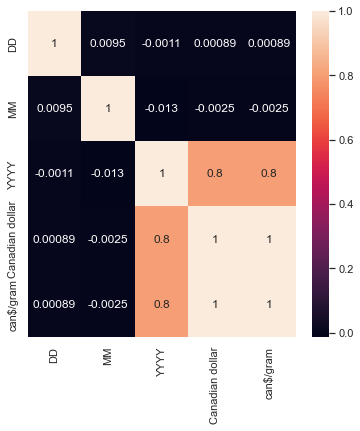

In [152]:
sns.set(rc={"figure.figsize":(6, 6)})
sns.heatmap(can_price.corr(),annot=True)

 <h1>Data Visualization on Australia Gold Prices </h1>

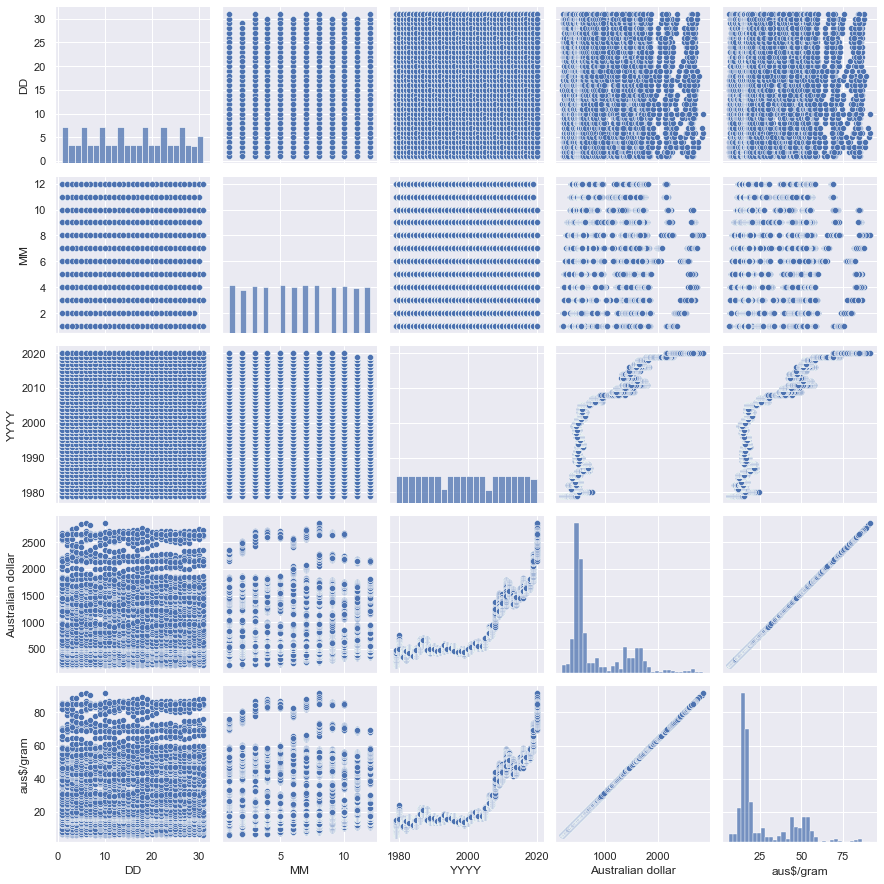

In [153]:
sns.pairplot(aus_price)

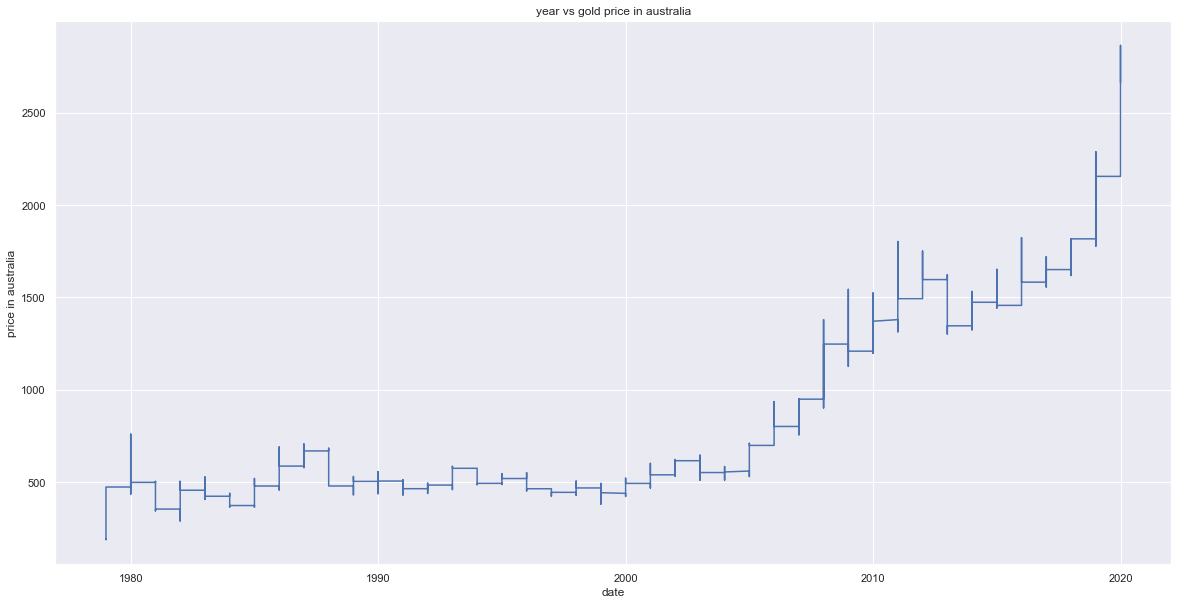

In [154]:
plt.figure(figsize=(20,10))
plt.plot(aus_price["YYYY"],aus_price["Australian dollar"])
plt.title("year vs gold price in australia")
plt.xlabel("date")
plt.ylabel("price in australia")
plt.show()

<AxesSubplot:xlabel='YYYY', ylabel='Australian dollar'>

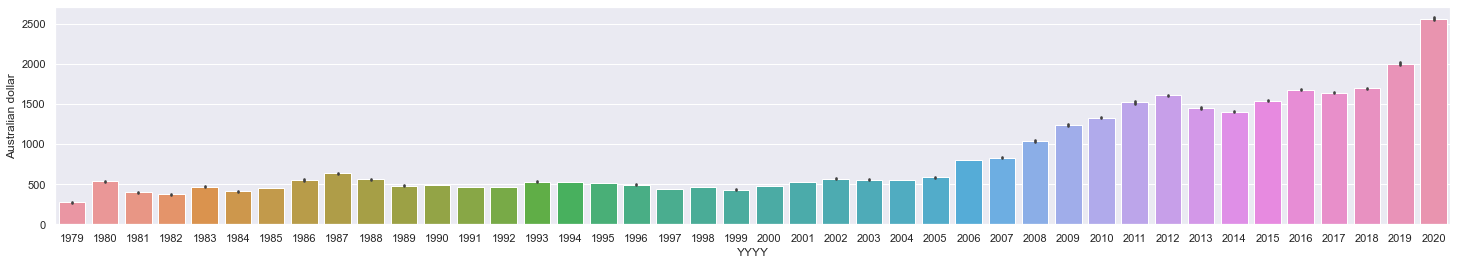

In [155]:
sns.set(rc={"figure.figsize":(25, 4)})
sns.barplot(data=aus_price,x="YYYY",y="Australian dollar")

<AxesSubplot:xlabel='Australian dollar', ylabel='Density'>

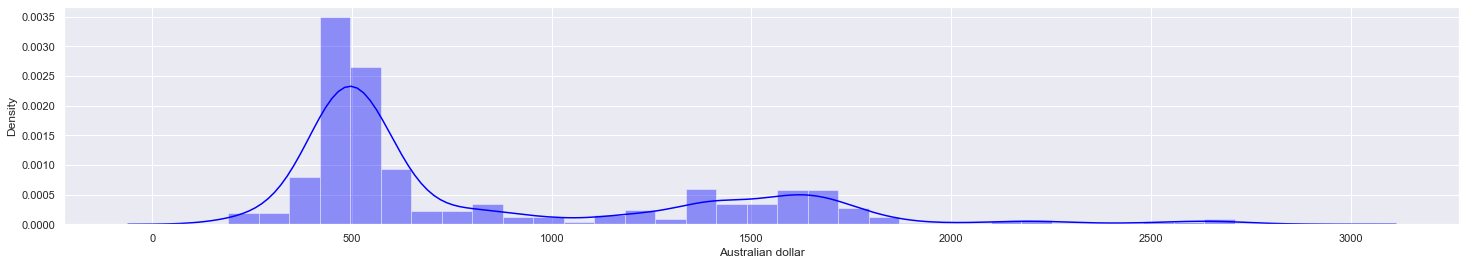

In [156]:
sns.distplot(aus_price["Australian dollar"],color="blue")

<AxesSubplot:>

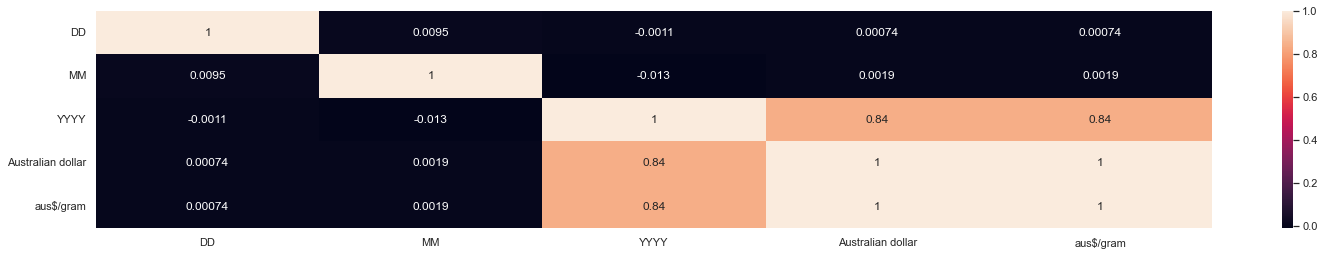

In [157]:

sns.heatmap(aus_price.corr(),annot=True)

# Training/testing and selecting best model on indian prices

<h3>Algorithms<br><br>
    1. LinearRegression <br>
    2. Lasso <br>
    3. DecisionTreeRegressor <br>
    4. RandomForestRegressor <br>
    5. ElasticNet <br>
    <h3>


In [158]:
x=ind_price.drop(["Indian rupee","Rs/gram"],axis=1)
y=ind_price["Rs/gram"]

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [160]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8719, 3)
(2180, 3)
(8719,)
(2180,)


In [161]:
from sklearn.linear_model import LinearRegression
model11=LinearRegression()
model11.fit(X_train,y_train)
y_pred=model11.predict(X_test)

In [162]:
print("training accuracy:", model11.score(X_train,y_train))
print("testing accuracy:",model11.score(X_test,y_test))

training accuracy: 0.7605601856406536
testing accuracy: 0.7540726730047129


In [163]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.6849742558933211
MAE: 430.40496273982626
MSE: 273592.69334952853


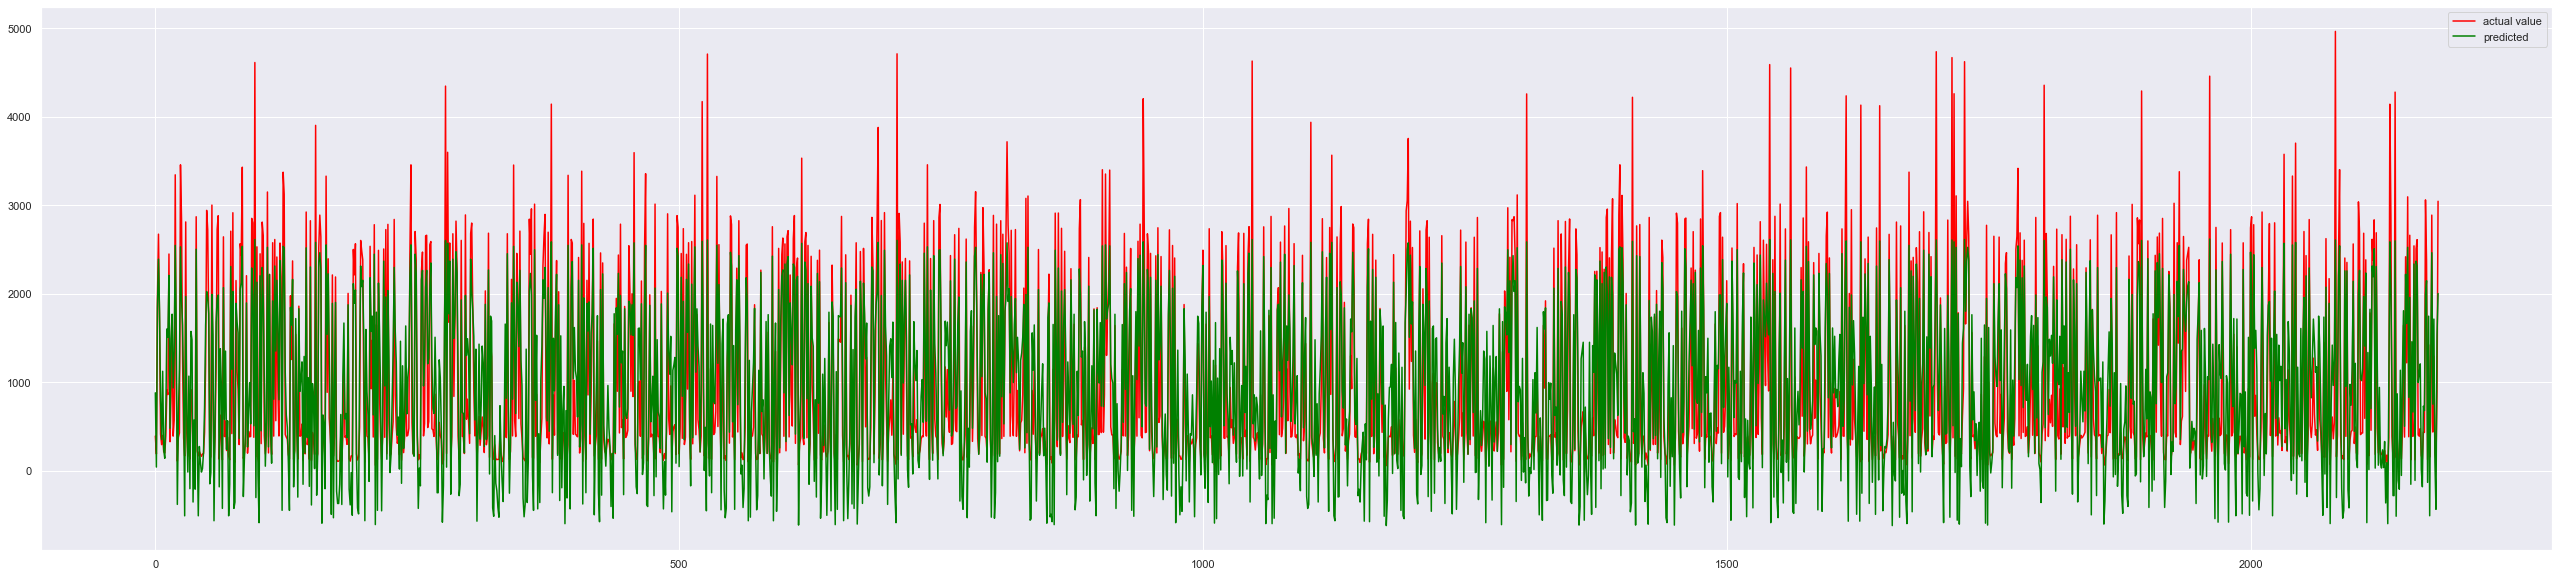

In [164]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [165]:
from sklearn.linear_model import Lasso
model12=Lasso()
model12.fit(X_train,y_train)
y_pred=model12.predict(X_test)

In [166]:
print("training accuracy:", model12.score(X_train,y_train))
print("testing accuracy:",model12.score(X_test,y_test))

training accuracy: 0.7605600955453415
testing accuracy: 0.7540762197420275


In [167]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.6849122970314092
MAE: 430.3960857141382
MSE: 273588.7476252921


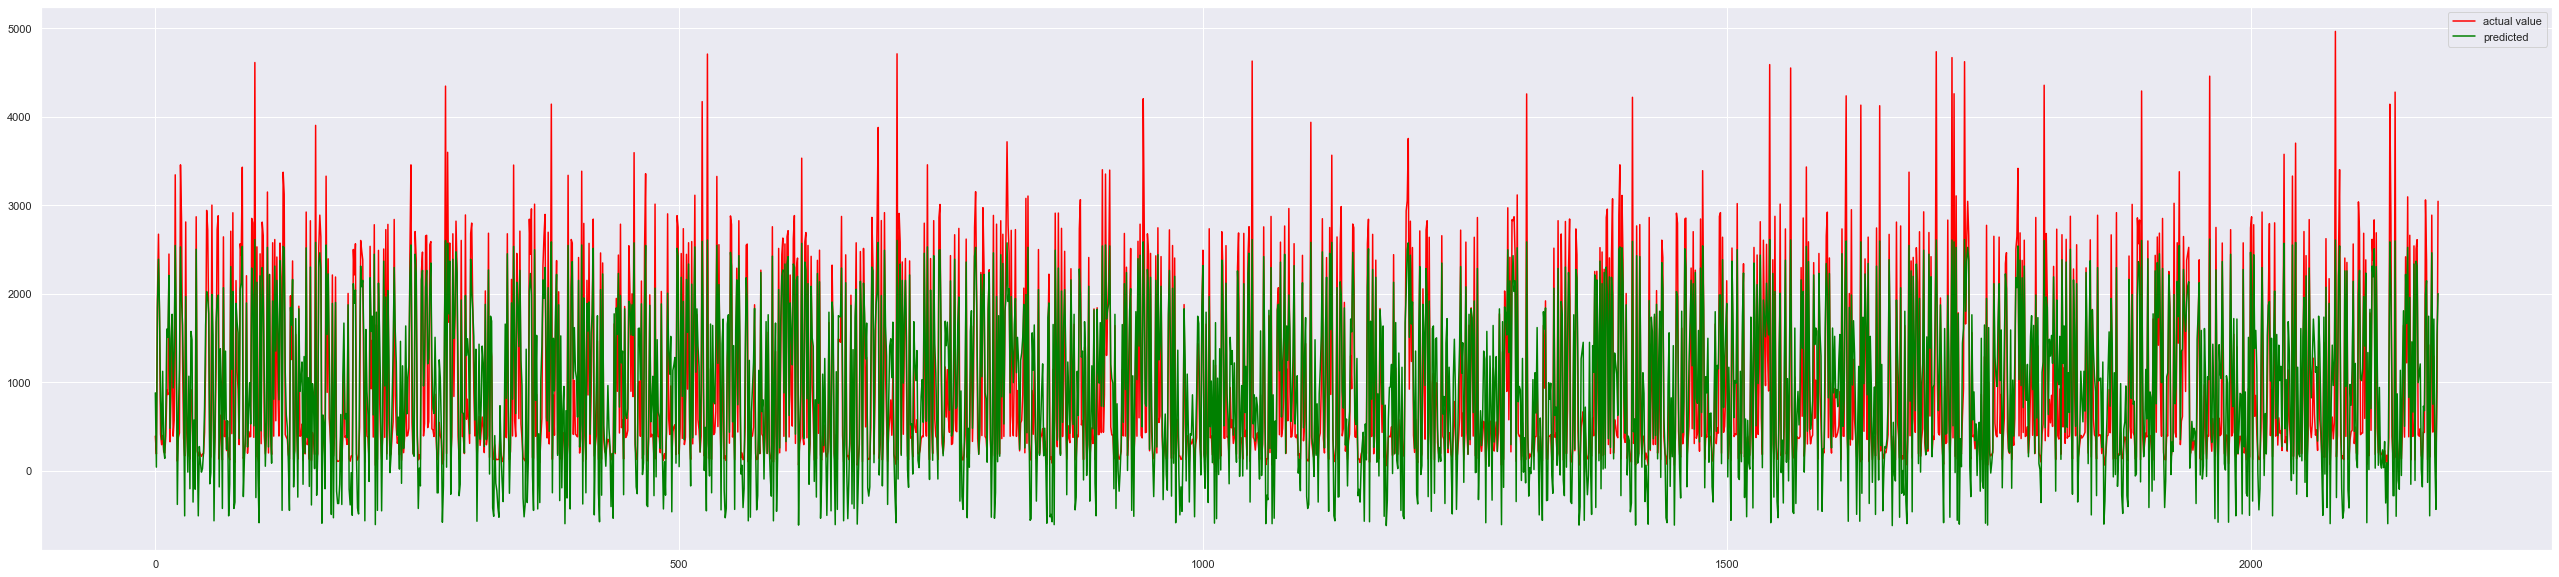

In [168]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [169]:
from sklearn.tree import DecisionTreeRegressor
model13=DecisionTreeRegressor()
model13.fit(X_train,y_train)
y_pred=model13.predict(X_test)

In [170]:
print("training accuracy:", model13.score(X_train,y_train))
print("testing accuracy:",model13.score(X_test,y_test))

training accuracy: 1.0
testing accuracy: 0.9996770316365986


In [171]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.9996772937752233
MAE: 8.595523112208886
MSE: 359.30038962834544


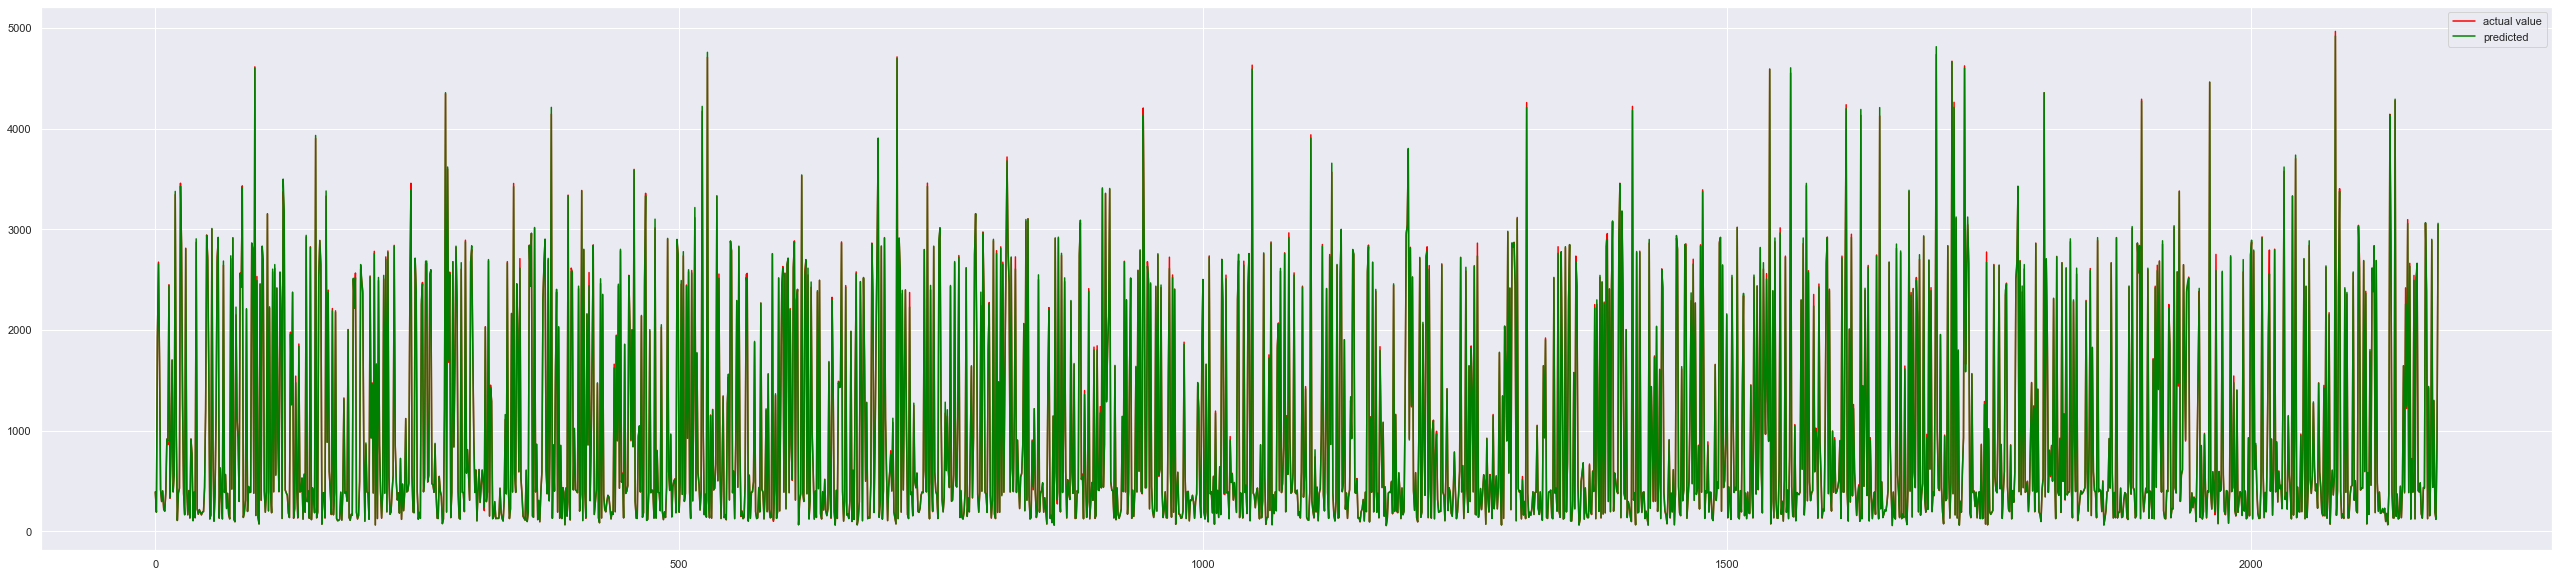

In [172]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [173]:
from sklearn.ensemble import RandomForestRegressor
model14=RandomForestRegressor()
model14.fit(X_train,y_train)
y_pred=model14.predict(X_test)

In [174]:
print("training accuracy:", model14.score(X_train,y_train))
print("testing accuracy:", model14.score(X_test,y_test))

training accuracy: 0.9999580754288422
testing accuracy: 0.9997070579667098


In [175]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.9997073453055322
MAE: 8.179851784874174
MSE: 325.8962753849962


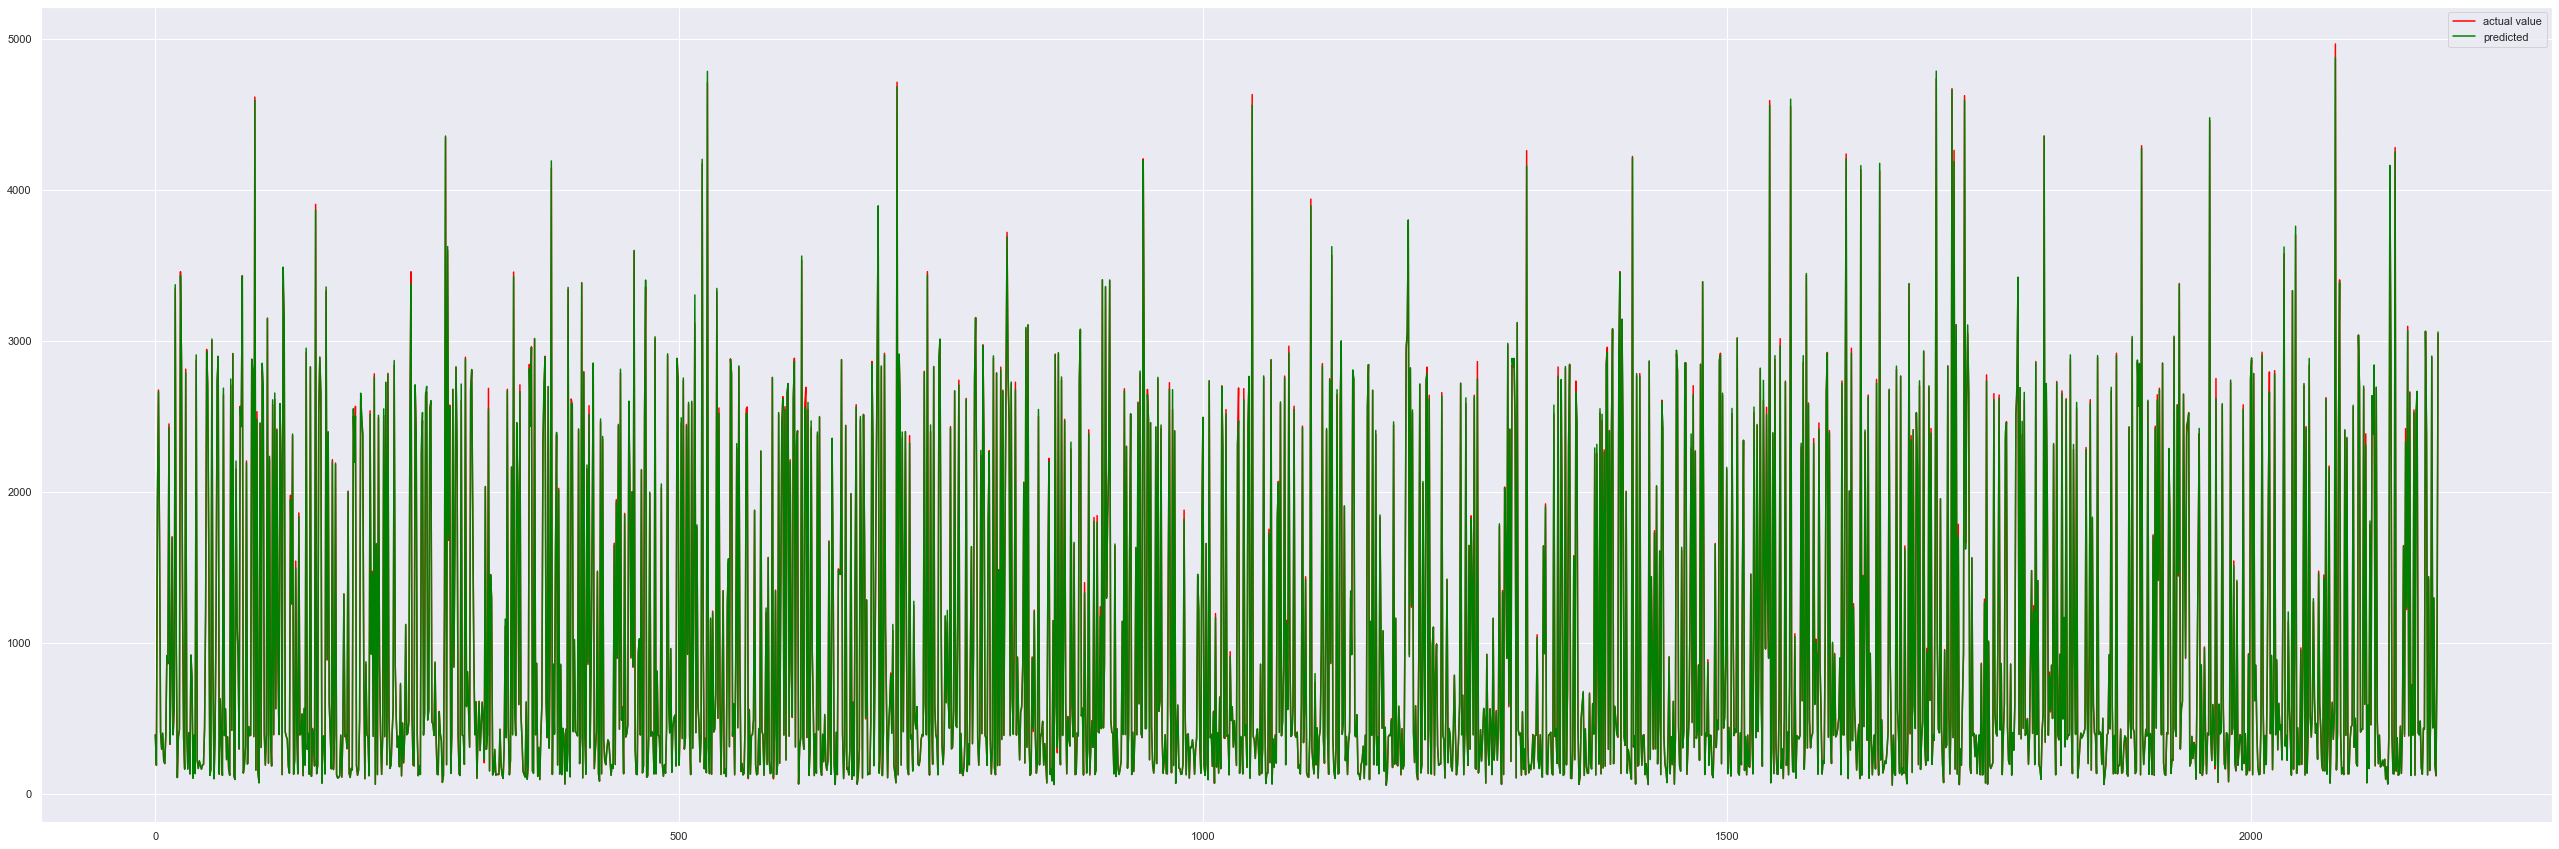

In [176]:
y_test=list(y_test)
plt.figure(figsize=(45,15))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [177]:
from sklearn.linear_model import ElasticNet
model15=ElasticNet()
model15.fit(X_train,y_train)
y_pred=model15.predict(X_test)

In [178]:
print("training accuracy:", model15.score(X_train,y_train))
print("testing accuracy:",model15.score(X_test,y_test))

training accuracy: 0.7605502955507732
testing accuracy: 0.7541607452544545


In [179]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.6828725087206786
MAE: 430.2604551285628
MSE: 273494.7134938102


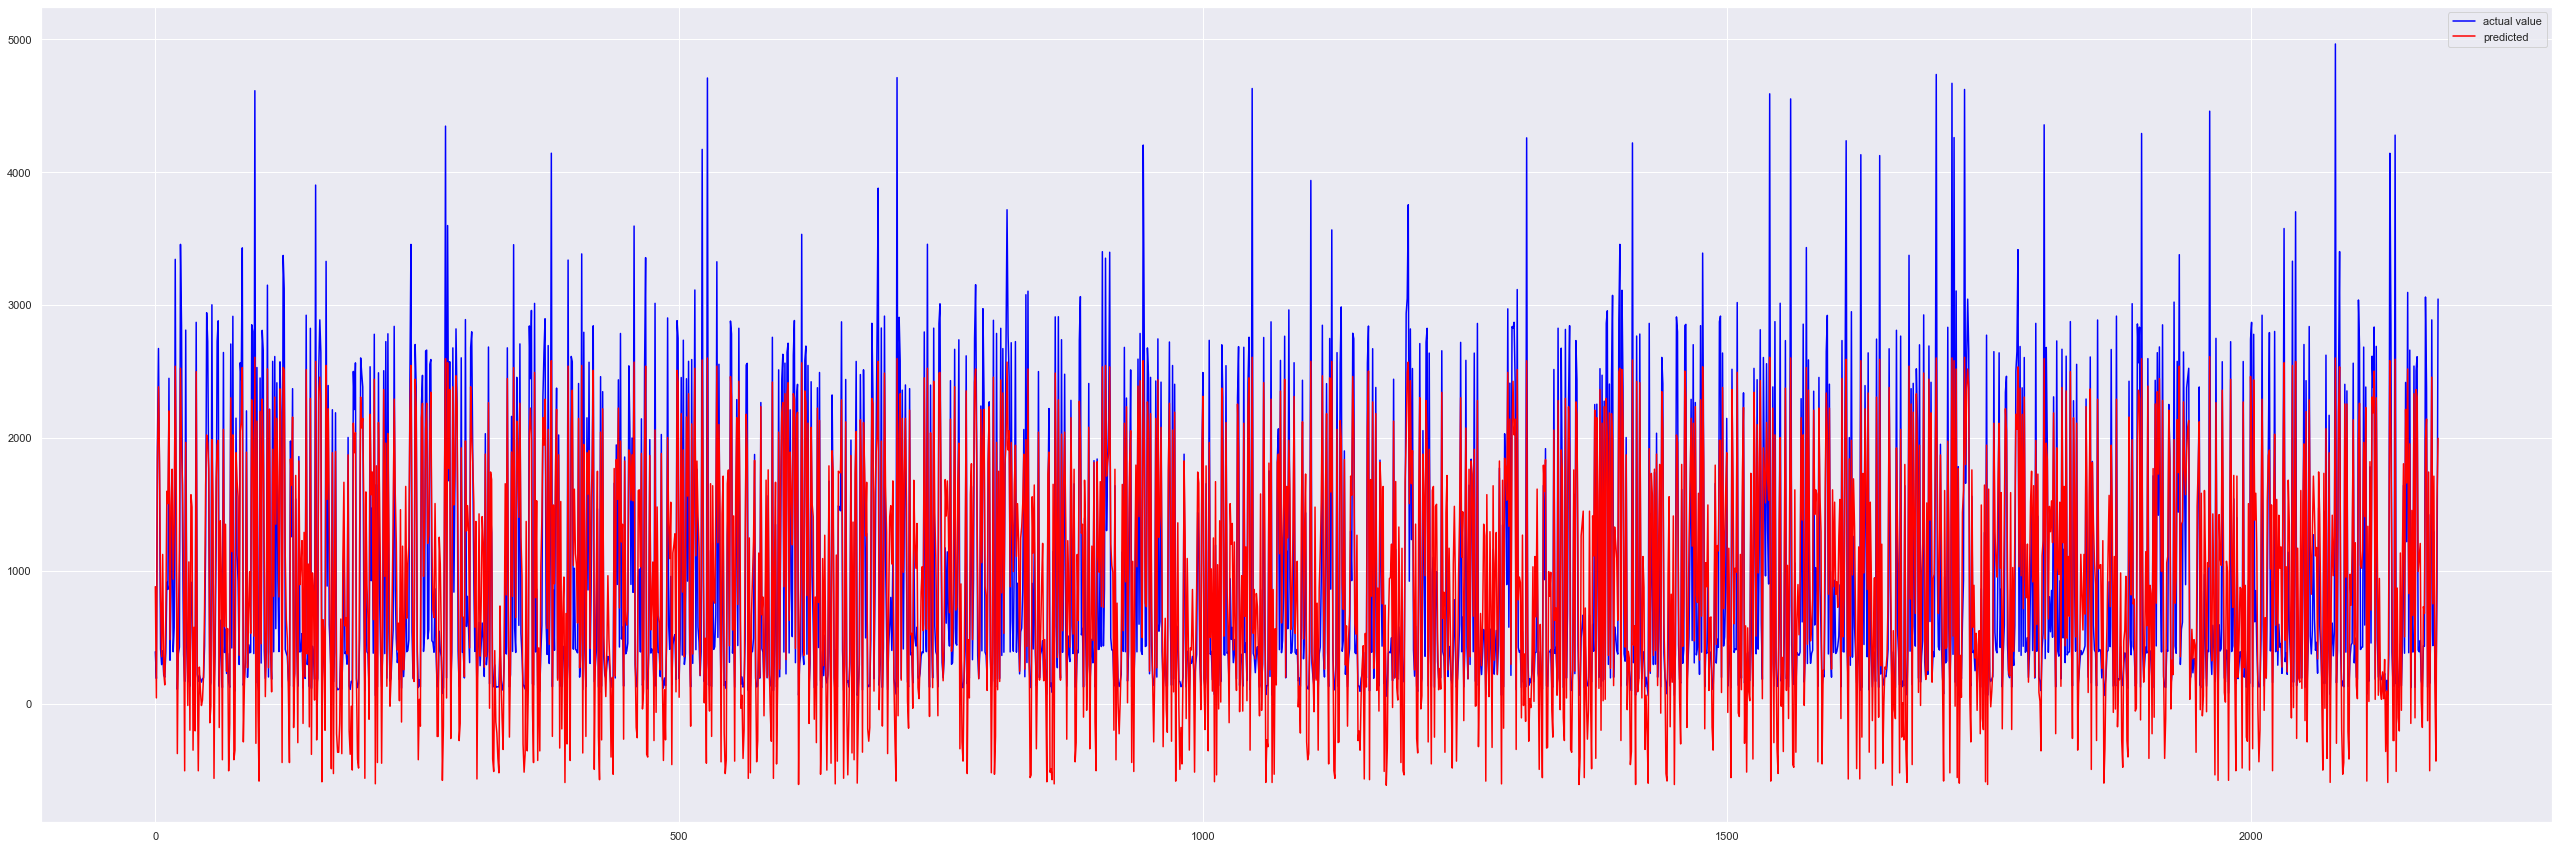

In [180]:
y_test=list(y_test)
plt.figure(figsize=(45,15))
plt.plot(y_test,label="actual value" ,color="blue")
plt.plot(y_pred,label="predicted",color="red" )
plt.legend()
plt.show()

# 
from above we concluded that out of 5 algorithms we got best accuracy in RandomForestRegressor.
we are dumping this in pickle file.
using RandomForestRegressor on all the remaining countries data.

In [181]:
import pickle
with open("india.pkl","wb") as f:
    pickle.dump(model14,f)

In [182]:
import bz2file as bz2
import pickle
def compressed_pickle(title, data):

 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)
compressed_pickle("india.pkl", model14)


# Training/testing and selecting best model on US prices

In [183]:
x=us_price.drop(["US dollar","$/gram"],axis=1)
y=us_price["$/gram"]

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8719, 3)
(2180, 3)
(8719,)
(2180,)


In [186]:
from sklearn.ensemble import RandomForestRegressor
model21=RandomForestRegressor()
model21.fit(X_train,y_train)
y_pred=model21.predict(X_test)

In [187]:

print("training accuracy:", model21.score(X_train,y_train))
print("testing accuracy:",model21.score(X_test,y_test))

training accuracy: 0.9999261275948604
testing accuracy: 0.9993688370321996


In [188]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.999369165301095
MAE: 0.18874783874382553
MSE: 0.1287196436731148


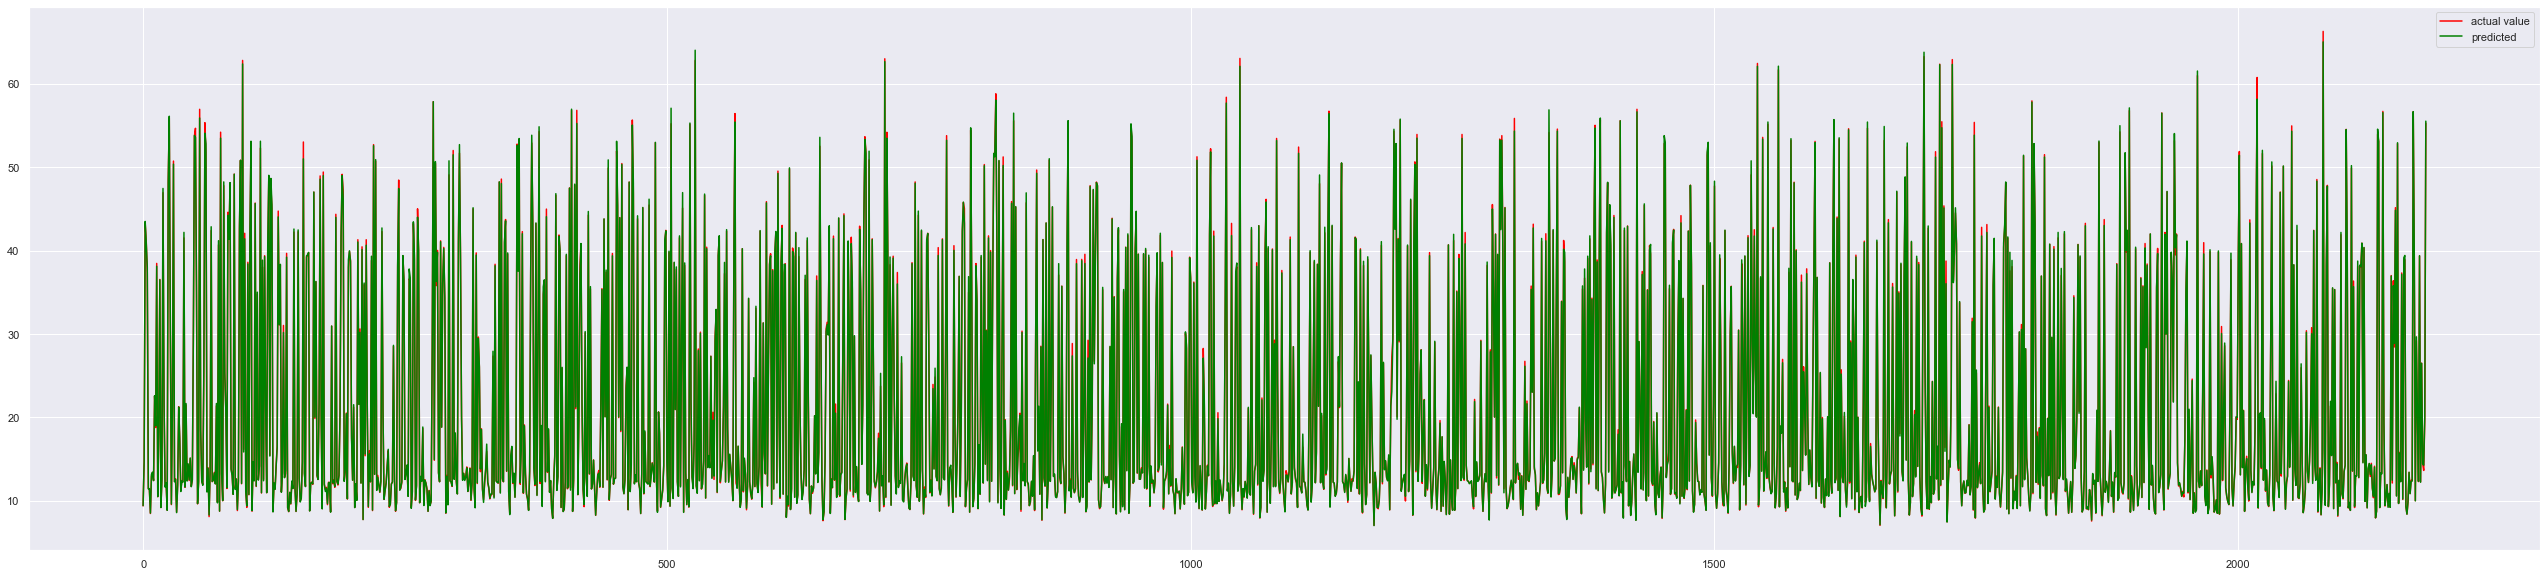

In [189]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [190]:
import pickle
with open("us.pkl","wb") as f:
    pickle.dump(model21,f)

In [191]:
import bz2file as bz2
import pickle
def compressed_pickle(title, data):

 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)
compressed_pickle("us.pkl", model21)


# Training/testing and selecting best model on Europe prices

In [192]:
x=euro_price.drop(["Euro","Euro/gram"],axis=1)
y=euro_price["Euro/gram"]

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [194]:
from sklearn.ensemble import RandomForestRegressor
model31=RandomForestRegressor()
model31.fit(X_train,y_train)
y_pred=model31.predict(X_test)

In [195]:
print("training accuracy:", model31.score(X_train,y_train))
print("testing accuracy:",model31.score(X_test,y_test))

training accuracy: 0.9999387516180038
testing accuracy: 0.9995483417803289


In [196]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.9995481719267195
MAE: 0.14075389614208408
MSE: 0.05898952833543329


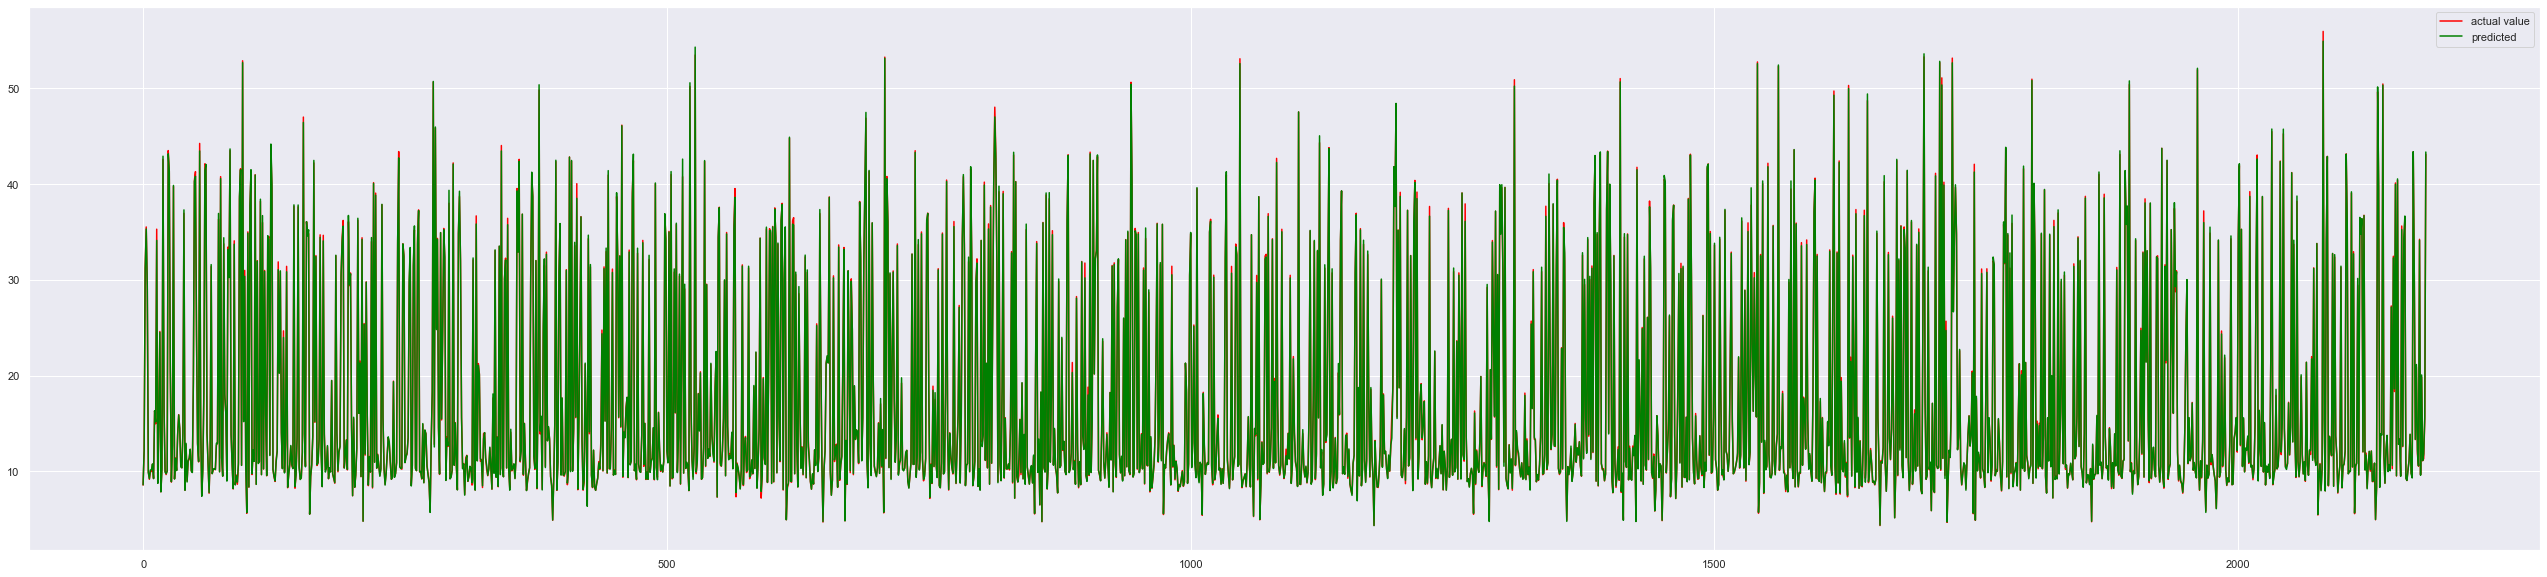

In [197]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [198]:
import pickle
with open("europe.pkl","wb") as f:
    pickle.dump(model31,f)

In [199]:
import bz2file as bz2
import pickle
def compressed_pickle(title, data):

 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)
compressed_pickle("europe.pkl", model31)


# Training/testing and selecting best model on Canada prices

In [200]:
x=can_price.drop(["Canadian dollar","can$/gram"],axis=1)
y=can_price["can$/gram"]

In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [202]:
from sklearn.ensemble import RandomForestRegressor
model41=RandomForestRegressor()
model41.fit(X_train,y_train)
y_pred=model41.predict(X_test)

In [203]:
print("training accuracy:", model41.score(X_train,y_train))
print("testing accuracy:",model41.score(X_test,y_test))

training accuracy: 0.9999242007096989
testing accuracy: 0.9993514753180662


In [204]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.9993518594017295
MAE: 0.2227945042342977
MSE: 0.168374720174721


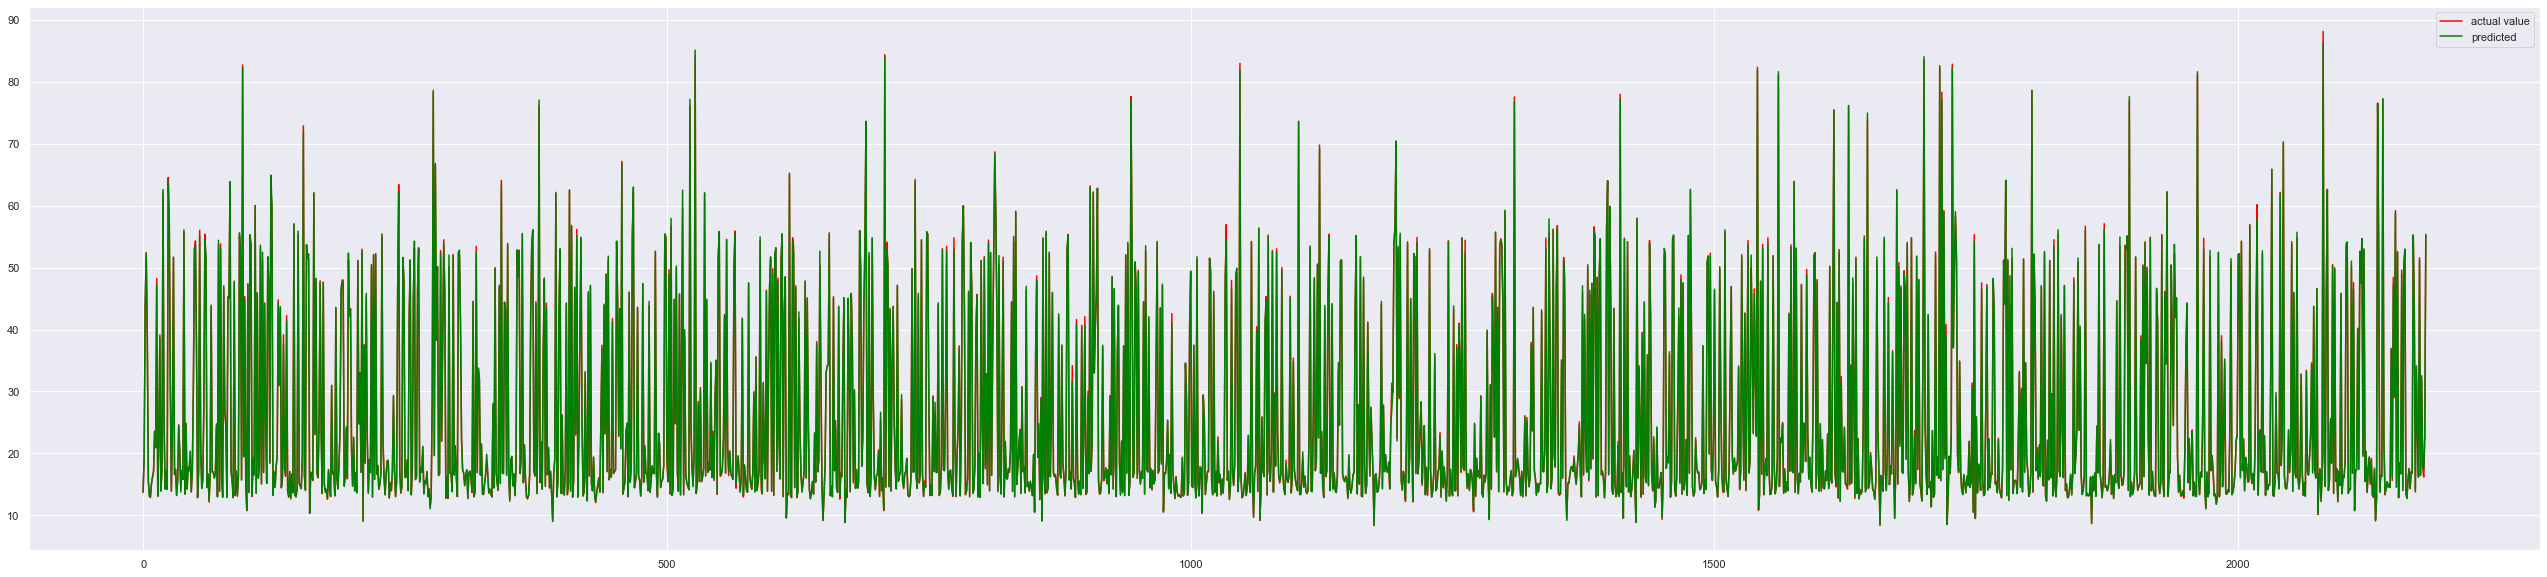

In [205]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [206]:
import pickle
with open("canada.pkl","wb") as f:
    pickle.dump(model41,f)

In [207]:
import bz2file as bz2
import pickle
def compressed_pickle(title, data):

 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)
compressed_pickle("canada.pkl", model41)


# Training/testing and selecting best model on Australia prices¶

In [208]:
x=aus_price.drop(["Australian dollar","aus$/gram"],axis=1)
y=aus_price["aus$/gram"]

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [210]:
from sklearn.ensemble import RandomForestRegressor
model51=RandomForestRegressor()
model51.fit(X_train,y_train)
y_pred=model51.predict(X_test)

In [211]:
print("training accuracy:", model51.score(X_train,y_train))
print("testing accuracy:",model51.score(X_test,y_test))

training accuracy: 0.9999289549963969
testing accuracy: 0.9993582880307846


In [212]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("r2_score:",r2_score(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("MSE:",mean_squared_error(y_pred,y_test))

r2_score: 0.9993578476097124
MAE: 0.2343328922606446
MSE: 0.1829838293893139


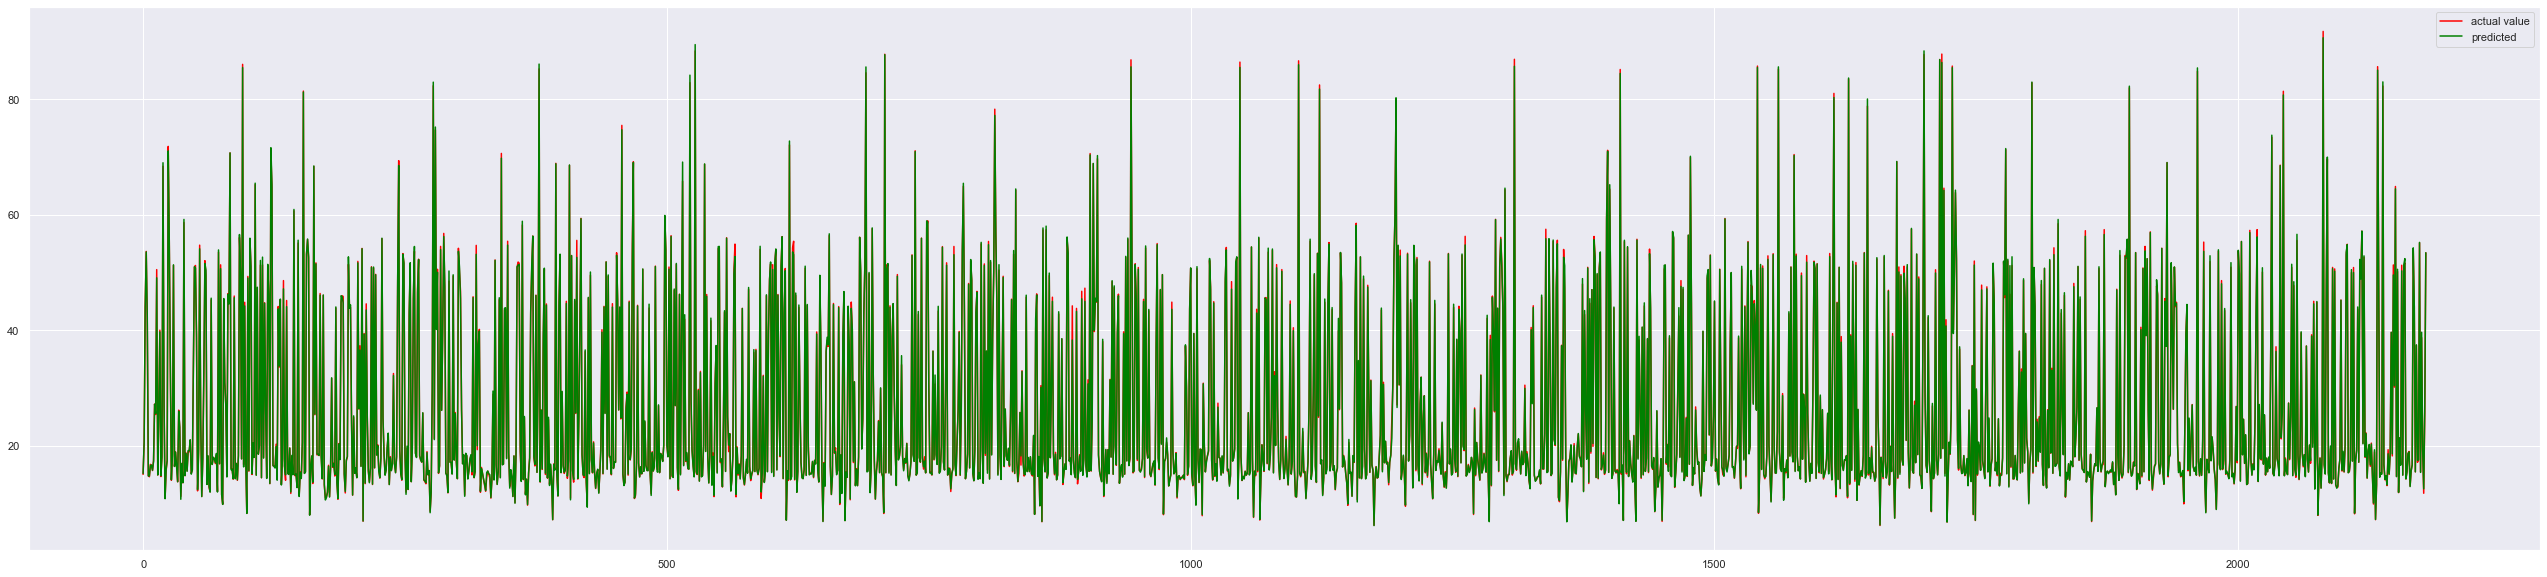

In [213]:
y_test=list(y_test)
plt.figure(figsize=(45,10))
plt.plot(y_test,label="actual value",color="red")
plt.plot(y_pred,label="predicted",color="green")
plt.legend()
plt.show()

In [214]:
import pickle
with open("australia.pkl","wb") as f:
    pickle.dump(model51,f)

In [215]:
input=1,1,1978
print(model51.predict([input]))

[6.20727564]


In [216]:
import bz2file as bz2
import pickle

In [217]:
def compressed_pickle(title, data):

 with bz2.BZ2File(title + '.pbz2', 'w') as f:
  pickle.dump(data, f)

In [218]:
compressed_pickle("australia.pkl", model51)